MODULE1:Training & Dataset Preprocessing Module

Import Libraries

In [1]:
import numpy as np# linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt# for data visualization
import seaborn as sns# for statistical data visualization
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline

Import Dataset

In [3]:
df=pd.read_csv(r"/content/Live_20210128.csv")

Analyze the Data

check the shape of the dataset

In [4]:
df.shape

(7050, 16)

Preview the dataset

In [5]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [6]:
dfcopy=df

In [7]:
dfcopy

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


View summary of dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

Check  missing values in the dataset

In [9]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

Drop redundant columns

In [ ]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

Again view summary of dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

Explore status_id variable

In [11]:
# view the labels in the variable
df['status_id'].unique()

array([   1,    2,    3, ..., 7048, 7049, 7050])

In [12]:
# view how many different types of variables are there
len(df['status_id'].unique())

7050

Explore status_published variable

In [13]:
# view the labels in the variable
df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [ ]:
# view how many different types of variables are there
len(df['status_published'].unique())

6913

Explore status_type variable

In [14]:
# view the labels in the variable
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [15]:
# view how many different types of variables are there
len(df['status_type'].unique())

4

In [16]:
#Drop status_id and status_published variable from the dataset
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

View the summary of dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   status_type    7050 non-null   object 
 1   num_reactions  7050 non-null   int64  
 2   num_comments   7050 non-null   int64  
 3   num_shares     7050 non-null   int64  
 4   num_likes      7050 non-null   int64  
 5   num_loves      7050 non-null   int64  
 6   num_wows       7050 non-null   int64  
 7   num_hahas      7050 non-null   int64  
 8   num_sads       7050 non-null   int64  
 9   num_angrys     7050 non-null   int64  
 10  Column1        0 non-null      float64
 11  Column2        0 non-null      float64
 12  Column3        0 non-null      float64
 13  Column4        0 non-null      float64
dtypes: float64(4), int64(9), object(1)
memory usage: 771.2+ KB


Preview the dataset again

In [18]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,video,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,photo,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,video,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,photo,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,photo,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


MODULE2:VECTOR REPRESENTATION MODULE

In [19]:
#Declare feature vector and target variable 
X =df
y =df['status_type']

Convert categorical variable into integers 

In [20]:
le=LabelEncoder()
X['status_type'] =le.fit_transform(X['status_type'])
y =le.transform(y)

In [21]:
#View the summary of dataset
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   status_type    7050 non-null   int64  
 1   num_reactions  7050 non-null   int64  
 2   num_comments   7050 non-null   int64  
 3   num_shares     7050 non-null   int64  
 4   num_likes      7050 non-null   int64  
 5   num_loves      7050 non-null   int64  
 6   num_wows       7050 non-null   int64  
 7   num_hahas      7050 non-null   int64  
 8   num_sads       7050 non-null   int64  
 9   num_angrys     7050 non-null   int64  
 10  Column1        0 non-null      float64
 11  Column2        0 non-null      float64
 12  Column3        0 non-null      float64
 13  Column4        0 non-null      float64
dtypes: float64(4), int64(10)
memory usage: 771.2 KB


In [22]:
#Preview the dataset 
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,3,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,1,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,1,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,1,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
X2=X

In [ ]:
X2

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


MODULE3:FEATURE NORMALIZATION MODULE

In [23]:
cols=X.columns

In [24]:
ms=MinMaxScaler()
X =ms.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [25]:
X =pd.DataFrame(X, columns=[cols])

In [26]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,NaN,NaN,NaN,NaN
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,NaN,NaN,NaN,NaN
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN


In [ ]:
df1=X

In [27]:
df1

NameError: ignored

In [ ]:
df1.drop(['status_type','num_reactions','num_comments','num_loves','num_wows','num_hahas','num_sads','num_angrys'], axis=1, inplace=True)

C:\Users\hp 2018\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
df1

,num_shares,num_likes
0,0.076519,0.091720
1,0.000000,0.031847
2,0.016647,0.043312
3,0.000000,0.023567
4,0.000000,0.043312
...,...,...
7045,0.000000,0.018896
7046,0.000000,0.002972
7047,0.000000,0.000212
7048,0.006425,0.074098


In [28]:
df1.to_csv('C:/Users/hp 2018/Downloads/Facebook Clusters features.csv')

NameError: ignored

In [ ]:
df2=pd.read_csv(r"C:\Users\hp 2018\Downloads\Facebook Clusters features.csv")

In [ ]:
df2.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df2

,num_shares,num_likes
0,0.076519,0.091720
1,0.000000,0.031847
2,0.016647,0.043312
3,0.000000,0.023567
4,0.000000,0.043312
...,...,...
7045,0.000000,0.018896
7046,0.000000,0.002972
7047,0.000000,0.000212
7048,0.006425,0.074098


MODULE4:ELBOW METHOD MODULE

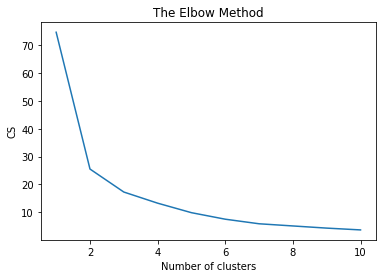

In [ ]:
cs= []
for i in range(1, 11):
    kmeans=KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df2)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


MODULE5:U-K-MEANS CLUSTERING MODULE

To find Initial Centroid

In [ ]:
#To store the column in the  array
x1=df2.to_numpy()
np.set_printoptions(threshold=np.inf)
print(repr(x1))

array([[7.65186916e-02, 9.17197452e-02],
       [0.00000000e+00, 3.18471338e-02],
       [1.66471963e-02, 4.33121019e-02],
       [0.00000000e+00, 2.35668790e-02],
       [0.00000000e+00, 4.33121019e-02],
       [0.00000000e+00, 4.47983015e-02],
       [2.10280374e-02, 8.87473461e-02],
       [1.54789720e-02, 5.52016985e-02],
       [0.00000000e+00, 4.20382166e-02],
       [2.92056075e-04, 3.54564756e-02],
       [8.76168224e-04, 4.28874735e-02],
       [0.00000000e+00, 4.52229299e-02],
       [5.84112150e-04, 6.47558386e-02],
       [0.00000000e+00, 4.24628450e-02],
       [0.00000000e+00, 7.11252654e-02],
       [8.76168224e-03, 6.43312102e-02],
       [2.30724299e-02, 2.48407643e-02],
       [1.37266355e-02, 2.80254777e-02],
       [1.05140187e-02, 4.07643312e-02],
       [0.00000000e+00, 3.16348195e-02],
       [2.92056075e-04, 4.69214437e-02],
       [2.92056075e-04, 4.60721868e-02],
       [0.00000000e+00, 2.03821656e-02],
       [0.00000000e+00, 3.82165605e-03],
       [0.000000

In [ ]:
len(x1)

7050

In [ ]:
#after sorted data objects  based on distance
sortedarray=[[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0, 0.000212314225],[0.000292056075, 0],[0.000292056075, 0],[0.000292056075, 0],[0.000292056075, 0],[0.000292056075, 0.000212314225],[0.000292056075, 0.000212314225],[0.000292056075, 0.000212314225],[0.000292056075, 0.000212314225],[0.000292056075, 0.000212314225],[0.000292056075, 0.000212314225],[0.000292056075, 0.000212314225],[0.000292056075, 0.000212314225],[0.000292056075, 0.000212314225],[0.000292056075, 0.000212314225],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0, 0.00042462845],[0.000292056075, 0.00042462845],[0.000292056075, 0.00042462845],[0.000292056075, 0.00042462845],[0.000292056075, 0.00042462845],[0.000292056075, 0.00042462845],[0.000292056075, 0.00042462845],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0, 0.000636942675],[0.000292056075, 0.000636942675],[0.000292056075, 0.000636942675],[0.000292056075, 0.000636942675],[0.000292056075, 0.000636942675],[0.000292056075, 0.000636942675],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0, 0.0008492569],[0.00058411215, 0.000636942675],[0.00058411215, 0.000636942675],[0.00058411215, 0.000636942675],[0.00058411215, 0.000636942675],[0.000292056075, 0.0008492569],[0.000292056075, 0.0008492569],[0.000292056075, 0.0008492569],[0.000292056075, 0.0008492569],[0.000292056075, 0.0008492569],[0.000292056075, 0.0008492569],[0.000292056075, 0.0008492569],[0.000292056075, 0.0008492569],[0.000292056075, 0.0008492569],[0.000876168224, 0.000212314225],[0.00058411215, 0.0008492569],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0, 0.00106157113],[0.000292056075, 0.00106157113],[0.000292056075, 0.00106157113],[0.000292056075, 0.00106157113],[0.000292056075, 0.00106157113],[0.000292056075, 0.00106157113],[0.000292056075, 0.00106157113],[0.000292056075, 0.00106157113],[0.000292056075, 0.00106157113],[0.000292056075, 0.00106157113],[0.000292056075, 0.00106157113],[0.00058411215, 0.00106157113],[0.00058411215, 0.00106157113],[0.000876168224, 0.0008492569],[0.000876168224, 0.0008492569],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0, 0.00127388535],[0.000292056075, 0.00127388535],[0.000292056075, 0.00127388535],[0.000292056075, 0.00127388535],[0.000292056075, 0.00127388535],[0.000292056075, 0.00127388535],[0.000292056075, 0.00127388535],[0.00058411215, 0.00127388535],[0.00058411215, 0.00127388535],[0.00058411215, 0.00127388535],[0.00058411215, 0.00127388535],[0.00058411215, 0.00127388535],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0, 0.00148619958],[0.000292056075, 0.00148619958],[0.000292056075, 0.00148619958],[0.000292056075, 0.00148619958],[0.000292056075, 0.00148619958],[0.000292056075, 0.00148619958],[0.000292056075, 0.00148619958],[0.000292056075, 0.00148619958],[0.000292056075, 0.00148619958],[0.000292056075, 0.00148619958],[0.00058411215, 0.00148619958],[0.00058411215, 0.00148619958],[0.00058411215, 0.00148619958],[0.00058411215, 0.00148619958],[0.00058411215, 0.00148619958],[0.00058411215, 0.00148619958],[0.00058411215, 0.00148619958],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0, 0.0016985138],[0.000292056075, 0.0016985138],[0.000292056075, 0.0016985138],[0.000292056075, 0.0016985138],[0.000292056075, 0.0016985138],[0.000292056075, 0.0016985138],[0.000292056075, 0.0016985138],[0.000292056075, 0.0016985138],[0.00058411215, 0.0016985138],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0, 0.00191082803],[0.000292056075, 0.00191082803],[0.000292056075, 0.00191082803],[0.000292056075, 0.00191082803],[0.000292056075, 0.00191082803],[0.000292056075, 0.00191082803],[0.000292056075, 0.00191082803],[0.000292056075, 0.00191082803],[0.000292056075, 0.00191082803],[0.000292056075, 0.00191082803],[0.000292056075, 0.00191082803],[0.00058411215, 0.00191082803],[0.00175233645, 0.00106157113],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0, 0.00212314225],[0.000292056075, 0.00212314225],[0.000292056075, 0.00212314225],[0.000292056075, 0.00212314225],[0.000292056075, 0.00212314225],[0.000292056075, 0.00212314225],[0.000292056075, 0.00212314225],[0.000292056075, 0.00212314225],[0.000292056075, 0.00212314225],[0.000292056075, 0.00212314225],[0.0011682243, 0.00191082803],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0, 0.00233545648],[0.000292056075, 0.00233545648],[0.000292056075, 0.00233545648],[0.000292056075, 0.00233545648],[0.000292056075, 0.00233545648],[0.000292056075, 0.00233545648],[0.000292056075, 0.00233545648],[0.000292056075, 0.00233545648],[0.000292056075, 0.00233545648],[0.000292056075, 0.00233545648],[0.000292056075, 0.00233545648],[0.000292056075, 0.00233545648],[0.00058411215, 0.00233545648],[0.00058411215, 0.00233545648],[0.00058411215, 0.00233545648],[0.00058411215, 0.00233545648],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0, 0.0025477707],[0.000292056075, 0.0025477707],[0.000292056075, 0.0025477707],[0.000292056075, 0.0025477707],[0.000292056075, 0.0025477707],[0.000292056075, 0.0025477707],[0.000292056075, 0.0025477707],[0.000292056075, 0.0025477707],[0.000292056075, 0.0025477707],[0.000292056075, 0.0025477707],[0.000292056075, 0.0025477707],[0.00058411215, 0.0025477707],[0.00058411215, 0.0025477707],[0.000876168224, 0.0025477707],[0.000876168224, 0.0025477707],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0, 0.00276008493],[0.000292056075, 0.00276008493],[0.000292056075, 0.00276008493],[0.000292056075, 0.00276008493],[0.000292056075, 0.00276008493],[0.000292056075, 0.00276008493],[0.000292056075, 0.00276008493],[0.000292056075, 0.00276008493],[0.000292056075, 0.00276008493],[0.000292056075, 0.00276008493],[0.000292056075, 0.00276008493],[0.000292056075, 0.00276008493],[0.00204439252, 0.00191082803],[0.0011682243, 0.0025477707],[0.00058411215, 0.00276008493],[0.00058411215, 0.00276008493],[0.000876168224, 0.00276008493],[0.000876168224, 0.00276008493],[0.00175233645, 0.00233545648],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0, 0.00297239915],[0.000292056075, 0.00297239915],[0.000292056075, 0.00297239915],[0.000292056075, 0.00297239915],[0.000292056075, 0.00297239915],[0.000292056075, 0.00297239915],[0.000292056075, 0.00297239915],[0.000292056075, 0.00297239915],[0.000292056075, 0.00297239915],[0.000292056075, 0.00297239915],[0.000292056075, 0.00297239915],[0.000292056075, 0.00297239915],[0.000292056075, 0.00297239915],[0.000292056075, 0.00297239915],[0.00058411215, 0.00297239915],[0.00058411215, 0.00297239915],[0.00058411215, 0.00297239915],[0.00058411215, 0.00297239915],[0.00058411215, 0.00297239915],[0.00204439252, 0.00233545648],[0.0023364486, 0.00212314225],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0, 0.00318471338],[0.0011682243, 0.00297239915],[0.000292056075, 0.00318471338],[0.000292056075, 0.00318471338],[0.000292056075, 0.00318471338],[0.000292056075, 0.00318471338],[0.000292056075, 0.00318471338],[0.000292056075, 0.00318471338],[0.000292056075, 0.00318471338],[0.000292056075, 0.00318471338],[0.000292056075, 0.00318471338],[0.00058411215, 0.00318471338],[0.00204439252, 0.0025477707],[0.0023364486, 0.00233545648],[0.0011682243, 0.00318471338],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0, 0.0033970276],[0.000292056075, 0.0033970276],[0.000292056075, 0.0033970276],[0.000292056075, 0.0033970276],[0.000292056075, 0.0033970276],[0.000292056075, 0.0033970276],[0.000292056075, 0.0033970276],[0.000292056075, 0.0033970276],[0.000292056075, 0.0033970276],[0.000292056075, 0.0033970276],[0.000292056075, 0.0033970276],[0.000292056075, 0.0033970276],[0.000292056075, 0.0033970276],[0.000292056075, 0.0033970276],[0.00058411215, 0.0033970276],[0.00175233645, 0.00297239915],[0.0023364486, 0.0025477707],[0.00146028037, 0.00318471338],[0.000876168224, 0.0033970276],[0.0011682243, 0.0033970276],[0.0011682243, 0.0033970276],[0.0011682243, 0.0033970276],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0, 0.00360934183],[0.000292056075, 0.00360934183],[0.000292056075, 0.00360934183],[0.000292056075, 0.00360934183],[0.000292056075, 0.00360934183],[0.000292056075, 0.00360934183],[0.000292056075, 0.00360934183],[0.000292056075, 0.00360934183],[0.000292056075, 0.00360934183],[0.00058411215, 0.00360934183],[0.00058411215, 0.00360934183],[0.00262850467, 0.0025477707],[0.0035046729, 0.00127388535],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0, 0.00382165605],[0.000292056075, 0.00382165605],[0.000292056075, 0.00382165605],[0.000292056075, 0.00382165605],[0.000292056075, 0.00382165605],[0.000292056075, 0.00382165605],[0.000292056075, 0.00382165605],[0.000292056075, 0.00382165605],[0.000292056075, 0.00382165605],[0.000292056075, 0.00382165605],[0.000292056075, 0.00382165605],[0.000292056075, 0.00382165605],[0.000292056075, 0.00382165605],[0.000292056075, 0.00382165605],[0.00058411215, 0.00382165605],[0.000876168224, 0.00382165605],[0.00262850467, 0.00297239915],[0.0011682243, 0.00382165605],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0, 0.00403397028],[0.000292056075, 0.00403397028],[0.000292056075, 0.00403397028],[0.000292056075, 0.00403397028],[0.000292056075, 0.00403397028],[0.000292056075, 0.00403397028],[0.000292056075, 0.00403397028],[0.000292056075, 0.00403397028],[0.000292056075, 0.00403397028],[0.000292056075, 0.00403397028],[0.000292056075, 0.00403397028],[0.000292056075, 0.00403397028],[0.00058411215, 0.00403397028],[0.00058411215, 0.00403397028],[0.000876168224, 0.00403397028],[0.000876168224, 0.00403397028],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0, 0.0042462845],[0.000292056075, 0.0042462845],[0.000292056075, 0.0042462845],[0.000292056075, 0.0042462845],[0.000292056075, 0.0042462845],[0.000292056075, 0.0042462845],[0.000292056075, 0.0042462845],[0.000292056075, 0.0042462845],[0.000292056075, 0.0042462845],[0.000292056075, 0.0042462845],[0.000876168224, 0.0042462845],[0.00438084112, 0.00042462845],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0, 0.00445859873],[0.000292056075, 0.00445859873],[0.000292056075, 0.00445859873],[0.000292056075, 0.00445859873],[0.000292056075, 0.00445859873],[0.000292056075, 0.00445859873],[0.000292056075, 0.00445859873],[0.000292056075, 0.00445859873],[0.000292056075, 0.00445859873],[0.00058411215, 0.00445859873],[0.00058411215, 0.00445859873],[0.00058411215, 0.00445859873],[0.00058411215, 0.00445859873],[0.00438084112, 0.00106157113],[0.00438084112, 0.00106157113],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0, 0.00467091295],[0.000292056075, 0.00467091295],[0.000292056075, 0.00467091295],[0.000292056075, 0.00467091295],[0.000292056075, 0.00467091295],[0.000292056075, 0.00467091295],[0.000292056075, 0.00467091295],[0.000292056075, 0.00467091295],[0.000292056075, 0.00467091295],[0.000292056075, 0.00467091295],[0.000292056075, 0.00467091295],[0.000292056075, 0.00467091295],[0.000292056075, 0.00467091295],[0.000292056075, 0.00467091295],[0.00058411215, 0.00467091295],[0.00058411215, 0.00467091295],[0.00058411215, 0.00467091295],[0.00058411215, 0.00467091295],[0.00058411215, 0.00467091295],[0.00408878505, 0.0025477707],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0, 0.00488322718],[0.000292056075, 0.00488322718],[0.000292056075, 0.00488322718],[0.000292056075, 0.00488322718],[0.000292056075, 0.00488322718],[0.000292056075, 0.00488322718],[0.000292056075, 0.00488322718],[0.000292056075, 0.00488322718],[0.000292056075, 0.00488322718],[0.000292056075, 0.00488322718],[0.000292056075, 0.00488322718],[0.00146028037, 0.00467091295],[0.00058411215, 0.00488322718],[0.00058411215, 0.00488322718],[0.00058411215, 0.00488322718],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0, 0.0050955414],[0.00146028037, 0.00488322718],[0.000292056075, 0.0050955414],[0.000292056075, 0.0050955414],[0.000292056075, 0.0050955414],[0.000292056075, 0.0050955414],[0.000292056075, 0.0050955414],[0.000292056075, 0.0050955414],[0.000292056075, 0.0050955414],[0.000292056075, 0.0050955414],[0.00058411215, 0.0050955414],[0.00058411215, 0.0050955414],[0.00058411215, 0.0050955414],[0.00058411215, 0.0050955414],[0.00058411215, 0.0050955414],[0.000876168224, 0.0050955414],[0.000876168224, 0.0050955414],[0.0011682243, 0.0050955414],[0.0011682243, 0.0050955414],[0.00204439252, 0.00488322718],[0.00204439252, 0.00488322718],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0, 0.00530785563],[0.000292056075, 0.00530785563],[0.000292056075, 0.00530785563],[0.000292056075, 0.00530785563],[0.000292056075, 0.00530785563],[0.000292056075, 0.00530785563],[0.000292056075, 0.00530785563],[0.000292056075, 0.00530785563],[0.000292056075, 0.00530785563],[0.000292056075, 0.00530785563],[0.000292056075, 0.00530785563],[0.000292056075, 0.00530785563],[0.000292056075, 0.00530785563],[0.000292056075, 0.00530785563],[0.000292056075, 0.00530785563],[0.00058411215, 0.00530785563],[0.000876168224, 0.00530785563],[0.000876168224, 0.00530785563],[0.000876168224, 0.00530785563],[0.0011682243, 0.00530785563],[0.00146028037, 0.00530785563],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0, 0.00552016985],[0.000292056075, 0.00552016985],[0.000292056075, 0.00552016985],[0.000292056075, 0.00552016985],[0.000292056075, 0.00552016985],[0.000292056075, 0.00552016985],[0.000292056075, 0.00552016985],[0.000292056075, 0.00552016985],[0.00175233645, 0.00530785563],[0.00146028037, 0.00552016985],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0, 0.00573248408],[0.000292056075, 0.00573248408],[0.000292056075, 0.00573248408],[0.000292056075, 0.00573248408],[0.000292056075, 0.00573248408],[0.000292056075, 0.00573248408],[0.000292056075, 0.00573248408],[0.000292056075, 0.00573248408],[0.000292056075, 0.00573248408],[0.000292056075, 0.00573248408],[0.00058411215, 0.00573248408],[0.00058411215, 0.00573248408],[0.000876168224, 0.00573248408],[0.000876168224, 0.00573248408],[0.0023364486, 0.00530785563],[0.0011682243, 0.00573248408],[0.0011682243, 0.00573248408],[0.0011682243, 0.00573248408],[0.00146028037, 0.00573248408],[0.00146028037, 0.00573248408],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0, 0.0059447983],[0.000292056075, 0.0059447983],[0.000292056075, 0.0059447983],[0.000292056075, 0.0059447983],[0.000292056075, 0.0059447983],[0.000292056075, 0.0059447983],[0.000292056075, 0.0059447983],[0.00058411215, 0.0059447983],[0.00058411215, 0.0059447983],[0.00175233645, 0.00573248408],[0.000876168224, 0.0059447983],[0.00379672897, 0.00467091295],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0, 0.00615711253],[0.000292056075, 0.00615711253],[0.000292056075, 0.00615711253],[0.000292056075, 0.00615711253],[0.000292056075, 0.00615711253],[0.000292056075, 0.00615711253],[0.000292056075, 0.00615711253],[0.000292056075, 0.00615711253],[0.000292056075, 0.00615711253],[0.000292056075, 0.00615711253],[0.000292056075, 0.00615711253],[0.00058411215, 0.00615711253],[0.00058411215, 0.00615711253],[0.00058411215, 0.00615711253],[0.000876168224, 0.00615711253],[0.000876168224, 0.00615711253],[0.000876168224, 0.00615711253],[0.00146028037, 0.00615711253],[0.00146028037, 0.00615711253],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0, 0.00636942675],[0.000292056075, 0.00636942675],[0.000292056075, 0.00636942675],[0.000292056075, 0.00636942675],[0.000292056075, 0.00636942675],[0.000292056075, 0.00636942675],[0.000292056075, 0.00636942675],[0.000292056075, 0.00636942675],[0.00058411215, 0.00636942675],[0.00058411215, 0.00636942675],[0.00175233645, 0.00615711253],[0.0011682243, 0.00636942675],[0.0011682243, 0.00636942675],[0.00496495327, 0.0042462845],[0, 0.00658174098],[0, 0.00658174098],[0, 0.00658174098],[0, 0.00658174098],[0, 0.00658174098],[0, 0.00658174098],[0, 0.00658174098],[0, 0.00658174098],[0, 0.00658174098],[0, 0.00658174098],[0, 0.00658174098],[0, 0.00658174098],[0, 0.00658174098],[0, 0.00658174098],[0, 0.00658174098],[0, 0.00658174098],[0, 0.00658174098],[0, 0.00658174098],[0, 0.00658174098],[0, 0.00658174098],[0, 0.00658174098],[0, 0.00658174098],[0, 0.00658174098],[0, 0.00658174098],[0, 0.00658174098],[0.000292056075, 0.00658174098],[0.000292056075, 0.00658174098],[0.000292056075, 0.00658174098],[0.000292056075, 0.00658174098],[0.000292056075, 0.00658174098],[0.00058411215, 0.00658174098],[0.00058411215, 0.00658174098],[0.000876168224, 0.00658174098],[0.0011682243, 0.00658174098],[0.0011682243, 0.00658174098],[0.00204439252, 0.00636942675],[0.00262850467, 0.00615711253],[0.00379672897, 0.00552016985],[0.0046728972, 0.00488322718],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0, 0.0067940552],[0.000292056075, 0.0067940552],[0.000292056075, 0.0067940552],[0.000292056075, 0.0067940552],[0.000292056075, 0.0067940552],[0.000292056075, 0.0067940552],[0.000292056075, 0.0067940552],[0.000292056075, 0.0067940552],[0.000292056075, 0.0067940552],[0.000292056075, 0.0067940552],[0.00058411215, 0.0067940552],[0.00058411215, 0.0067940552],[0.00058411215, 0.0067940552],[0.00146028037, 0.0067940552],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0, 0.00700636943],[0.000292056075, 0.00700636943],[0.000292056075, 0.00700636943],[0.000292056075, 0.00700636943],[0.000292056075, 0.00700636943],[0.000292056075, 0.00700636943],[0.00204439252, 0.0067940552],[0.00146028037, 0.00700636943],[0, 0.00721868365],[0, 0.00721868365],[0, 0.00721868365],[0, 0.00721868365],[0, 0.00721868365],[0, 0.00721868365],[0, 0.00721868365],[0, 0.00721868365],[0, 0.00721868365],[0, 0.00721868365],[0, 0.00721868365],[0, 0.00721868365],[0, 0.00721868365],[0, 0.00721868365],[0, 0.00721868365],[0, 0.00721868365],[0, 0.00721868365],[0, 0.00721868365],[0, 0.00721868365],[0, 0.00721868365],[0, 0.00721868365],[0, 0.00721868365],[0, 0.00721868365],[0, 0.00721868365],[0, 0.00721868365],[0.00175233645, 0.00700636943],[0.000292056075, 0.00721868365],[0.000292056075, 0.00721868365],[0.000292056075, 0.00721868365],[0.000292056075, 0.00721868365],[0.0046728972, 0.00573248408],[0.00175233645, 0.00721868365],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0, 0.00743099788],[0.000292056075, 0.00743099788],[0.000292056075, 0.00743099788],[0.000292056075, 0.00743099788],[0.000292056075, 0.00743099788],[0.000292056075, 0.00743099788],[0.000292056075, 0.00743099788],[0.000292056075, 0.00743099788],[0.000292056075, 0.00743099788],[0.00058411215, 0.00743099788],[0.00058411215, 0.00743099788],[0.000876168224, 0.00743099788],[0.00262850467, 0.00700636943],[0.00146028037, 0.00743099788],[0, 0.0076433121],[0, 0.0076433121],[0, 0.0076433121],[0, 0.0076433121],[0, 0.0076433121],[0, 0.0076433121],[0, 0.0076433121],[0, 0.0076433121],[0, 0.0076433121],[0, 0.0076433121],[0, 0.0076433121],[0, 0.0076433121],[0, 0.0076433121],[0, 0.0076433121],[0, 0.0076433121],[0, 0.0076433121],[0, 0.0076433121],[0, 0.0076433121],[0, 0.0076433121],[0.0035046729, 0.0067940552],[0.000292056075, 0.0076433121],[0.000292056075, 0.0076433121],[0.000292056075, 0.0076433121],[0.000292056075, 0.0076433121],[0.000292056075, 0.0076433121],[0.00058411215, 0.0076433121],[0.00525700935, 0.00573248408],[0.00146028037, 0.0076433121],[0, 0.00785562633],[0, 0.00785562633],[0, 0.00785562633],[0, 0.00785562633],[0, 0.00785562633],[0, 0.00785562633],[0, 0.00785562633],[0, 0.00785562633],[0, 0.00785562633],[0, 0.00785562633],[0, 0.00785562633],[0, 0.00785562633],[0, 0.00785562633],[0, 0.00785562633],[0, 0.00785562633],[0, 0.00785562633],[0, 0.00785562633],[0, 0.00785562633],[0, 0.00785562633],[0, 0.00785562633],[0, 0.00785562633],[0, 0.00785562633],[0, 0.00785562633],[0, 0.00785562633],[0, 0.00785562633],[0.000292056075, 0.00785562633],[0.000292056075, 0.00785562633],[0.00058411215, 0.00785562633],[0.0011682243, 0.00785562633],[0.0011682243, 0.00785562633],[0.00175233645, 0.00785562633],[0.00175233645, 0.00785562633],[0, 0.00806794055],[0, 0.00806794055],[0, 0.00806794055],[0, 0.00806794055],[0, 0.00806794055],[0, 0.00806794055],[0, 0.00806794055],[0, 0.00806794055],[0, 0.00806794055],[0, 0.00806794055],[0, 0.00806794055],[0, 0.00806794055],[0, 0.00806794055],[0, 0.00806794055],[0, 0.00806794055],[0, 0.00806794055],[0, 0.00806794055],[0, 0.00806794055],[0, 0.00806794055],[0, 0.00806794055],[0.000292056075, 0.00806794055],[0.000292056075, 0.00806794055],[0.000292056075, 0.00806794055],[0.000292056075, 0.00806794055],[0.000292056075, 0.00806794055],[0.000292056075, 0.00806794055],[0.000876168224, 0.00806794055],[0.000876168224, 0.00806794055],[0.00204439252, 0.00785562633],[0.00146028037, 0.00806794055],[0, 0.00828025478],[0, 0.00828025478],[0, 0.00828025478],[0, 0.00828025478],[0, 0.00828025478],[0, 0.00828025478],[0, 0.00828025478],[0, 0.00828025478],[0, 0.00828025478],[0, 0.00828025478],[0, 0.00828025478],[0, 0.00828025478],[0, 0.00828025478],[0, 0.00828025478],[0, 0.00828025478],[0, 0.00828025478],[0, 0.00828025478],[0, 0.00828025478],[0, 0.00828025478],[0.000292056075, 0.00828025478],[0.000292056075, 0.00828025478],[0.00058411215, 0.00828025478],[0.00204439252, 0.00806794055],[0.000876168224, 0.00828025478],[0.0011682243, 0.00828025478],[0.00146028037, 0.00828025478],[0.00262850467, 0.00806794055],[0, 0.008492569],[0, 0.008492569],[0, 0.008492569],[0, 0.008492569],[0, 0.008492569],[0, 0.008492569],[0, 0.008492569],[0, 0.008492569],[0, 0.008492569],[0, 0.008492569],[0, 0.008492569],[0, 0.008492569],[0, 0.008492569],[0, 0.008492569],[0, 0.008492569],[0, 0.008492569],[0, 0.008492569],[0, 0.008492569],[0, 0.008492569],[0, 0.008492569],[0, 0.008492569],[0, 0.008492569],[0, 0.008492569],[0, 0.008492569],[0, 0.008492569],[0.000292056075, 0.008492569],[0.000292056075, 0.008492569],[0.000292056075, 0.008492569],[0.000292056075, 0.008492569],[0.000292056075, 0.008492569],[0.000292056075, 0.008492569],[0.00058411215, 0.008492569],[0.00058411215, 0.008492569],[0.00058411215, 0.008492569],[0.00058411215, 0.008492569],[0.0046728972, 0.00721868365],[0.00438084112, 0.00743099788],[0.00175233645, 0.008492569],[0, 0.00870488323],[0, 0.00870488323],[0, 0.00870488323],[0, 0.00870488323],[0, 0.00870488323],[0, 0.00870488323],[0, 0.00870488323],[0, 0.00870488323],[0, 0.00870488323],[0, 0.00870488323],[0, 0.00870488323],[0, 0.00870488323],[0, 0.00870488323],[0, 0.00870488323],[0, 0.00870488323],[0, 0.00870488323],[0, 0.00870488323],[0, 0.00870488323],[0, 0.00870488323],[0, 0.00870488323],[0, 0.00870488323],[0, 0.00870488323],[0.000292056075, 0.00870488323],[0.000292056075, 0.00870488323],[0.000292056075, 0.00870488323],[0.000292056075, 0.00870488323],[0.000292056075, 0.00870488323],[0.00058411215, 0.00870488323],[0.00058411215, 0.00870488323],[0.00058411215, 0.00870488323],[0.0011682243, 0.00870488323],[0.00438084112, 0.0076433121],[0.00146028037, 0.00870488323],[0.00146028037, 0.00870488323],[0, 0.00891719745],[0, 0.00891719745],[0, 0.00891719745],[0, 0.00891719745],[0, 0.00891719745],[0, 0.00891719745],[0, 0.00891719745],[0, 0.00891719745],[0, 0.00891719745],[0, 0.00891719745],[0, 0.00891719745],[0, 0.00891719745],[0, 0.00891719745],[0.000292056075, 0.00891719745],[0.000292056075, 0.00891719745],[0.000292056075, 0.00891719745],[0.000292056075, 0.00891719745],[0.000292056075, 0.00891719745],[0.000292056075, 0.00891719745],[0.00058411215, 0.00891719745],[0.00058411215, 0.00891719745],[0.000876168224, 0.00891719745],[0.0011682243, 0.00891719745],[0.00408878505, 0.00806794055],[0.00262850467, 0.00870488323],[0.0058411215, 0.00700636943],[0, 0.00912951168],[0, 0.00912951168],[0, 0.00912951168],[0, 0.00912951168],[0, 0.00912951168],[0, 0.00912951168],[0, 0.00912951168],[0, 0.00912951168],[0, 0.00912951168],[0, 0.00912951168],[0, 0.00912951168],[0, 0.00912951168],[0, 0.00912951168],[0, 0.00912951168],[0.000292056075, 0.00912951168],[0.000292056075, 0.00912951168],[0.000292056075, 0.00912951168],[0.000292056075, 0.00912951168],[0.000292056075, 0.00912951168],[0.000292056075, 0.00912951168],[0.00058411215, 0.00912951168],[0.000876168224, 0.00912951168],[0.00408878505, 0.00828025478],[0.00321261682, 0.00870488323],[0, 0.0093418259],[0, 0.0093418259],[0, 0.0093418259],[0, 0.0093418259],[0, 0.0093418259],[0, 0.0093418259],[0, 0.0093418259],[0, 0.0093418259],[0, 0.0093418259],[0, 0.0093418259],[0, 0.0093418259],[0, 0.0093418259],[0, 0.0093418259],[0, 0.0093418259],[0.000292056075, 0.0093418259],[0.000292056075, 0.0093418259],[0.000292056075, 0.0093418259],[0.000292056075, 0.0093418259],[0.000292056075, 0.0093418259],[0.000292056075, 0.0093418259],[0.00058411215, 0.0093418259],[0.000876168224, 0.0093418259],[0.000876168224, 0.0093418259],[0.0035046729, 0.00870488323],[0.0011682243, 0.0093418259],[0.0023364486, 0.00912951168],[0.00321261682, 0.00891719745],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0, 0.00955414013],[0.000292056075, 0.00955414013],[0.00204439252, 0.0093418259],[0.00058411215, 0.00955414013],[0.000876168224, 0.00955414013],[0, 0.00976645435],[0, 0.00976645435],[0, 0.00976645435],[0, 0.00976645435],[0, 0.00976645435],[0, 0.00976645435],[0, 0.00976645435],[0, 0.00976645435],[0, 0.00976645435],[0, 0.00976645435],[0, 0.00976645435],[0, 0.00976645435],[0, 0.00976645435],[0, 0.00976645435],[0, 0.00976645435],[0, 0.00976645435],[0, 0.00976645435],[0, 0.00976645435],[0.00204439252, 0.00955414013],[0.000292056075, 0.00976645435],[0.000292056075, 0.00976645435],[0.000292056075, 0.00976645435],[0.000292056075, 0.00976645435],[0.000292056075, 0.00976645435],[0.00058411215, 0.00976645435],[0.00058411215, 0.00976645435],[0.00292056075, 0.0093418259],[0.00292056075, 0.0093418259],[0, 0.00997876858],[0, 0.00997876858],[0, 0.00997876858],[0, 0.00997876858],[0, 0.00997876858],[0, 0.00997876858],[0, 0.00997876858],[0, 0.00997876858],[0, 0.00997876858],[0, 0.00997876858],[0, 0.00997876858],[0, 0.00997876858],[0, 0.00997876858],[0, 0.00997876858],[0, 0.00997876858],[0.000292056075, 0.00997876858],[0.000292056075, 0.00997876858],[0.000292056075, 0.00997876858],[0.0011682243, 0.00997876858],[0.00262850467, 0.00976645435],[0.00175233645, 0.00997876858],[0.00876168224, 0.0050955414],[0, 0.0101910828],[0, 0.0101910828],[0, 0.0101910828],[0, 0.0101910828],[0, 0.0101910828],[0, 0.0101910828],[0, 0.0101910828],[0, 0.0101910828],[0, 0.0101910828],[0, 0.0101910828],[0, 0.0101910828],[0, 0.0101910828],[0, 0.0101910828],[0, 0.0101910828],[0, 0.0101910828],[0.000292056075, 0.0101910828],[0.000292056075, 0.0101910828],[0.000292056075, 0.0101910828],[0.00058411215, 0.0101910828],[0.00058411215, 0.0101910828],[0.00058411215, 0.0101910828],[0.00058411215, 0.0101910828],[0.00058411215, 0.0101910828],[0.000876168224, 0.0101910828],[0.000876168224, 0.0101910828],[0.0011682243, 0.0101910828],[0.00496495327, 0.00912951168],[0, 0.010403397],[0, 0.010403397],[0, 0.010403397],[0, 0.010403397],[0, 0.010403397],[0, 0.010403397],[0, 0.010403397],[0, 0.010403397],[0, 0.010403397],[0, 0.010403397],[0, 0.010403397],[0, 0.010403397],[0, 0.010403397],[0, 0.010403397],[0, 0.010403397],[0, 0.010403397],[0, 0.010403397],[0, 0.010403397],[0, 0.010403397],[0.000292056075, 0.010403397],[0.000292056075, 0.010403397],[0.000292056075, 0.010403397],[0.00058411215, 0.010403397],[0.00058411215, 0.010403397],[0.00058411215, 0.010403397],[0.00379672897, 0.00976645435],[0.00146028037, 0.010403397],[0.00438084112, 0.00955414013],[0.00262850467, 0.0101910828],[0.00175233645, 0.010403397],[0.00175233645, 0.010403397],[0.00175233645, 0.010403397],[0.00292056075, 0.0101910828],[0.00292056075, 0.0101910828],[0, 0.0106157113],[0, 0.0106157113],[0, 0.0106157113],[0, 0.0106157113],[0, 0.0106157113],[0, 0.0106157113],[0, 0.0106157113],[0, 0.0106157113],[0, 0.0106157113],[0, 0.0106157113],[0, 0.0106157113],[0, 0.0106157113],[0, 0.0106157113],[0, 0.0106157113],[0, 0.0106157113],[0, 0.0106157113],[0, 0.0106157113],[0, 0.0106157113],[0, 0.0106157113],[0.000292056075, 0.0106157113],[0.000292056075, 0.0106157113],[0.000876168224, 0.0106157113],[0.0058411215, 0.00891719745],[0.00525700935, 0.0093418259],[0.00175233645, 0.0106157113],[0.00496495327, 0.00955414013],[0.00292056075, 0.010403397],[0.0108060748, 0.000212314225],[0.0108060748, 0.00042462845],[0, 0.0108280255],[0, 0.0108280255],[0, 0.0108280255],[0, 0.0108280255],[0, 0.0108280255],[0, 0.0108280255],[0, 0.0108280255],[0, 0.0108280255],[0, 0.0108280255],[0, 0.0108280255],[0, 0.0108280255],[0, 0.0108280255],[0, 0.0108280255],[0, 0.0108280255],[0, 0.0108280255],[0, 0.0108280255],[0, 0.0108280255],[0.000292056075, 0.0108280255],[0.000292056075, 0.0108280255],[0.000292056075, 0.0108280255],[0.000292056075, 0.0108280255],[0.00058411215, 0.0108280255],[0.000876168224, 0.0108280255],[0.00175233645, 0.0108280255],[0.00175233645, 0.0108280255],[0.00175233645, 0.0108280255],[0.00292056075, 0.0106157113],[0, 0.0110403397],[0, 0.0110403397],[0, 0.0110403397],[0, 0.0110403397],[0, 0.0110403397],[0, 0.0110403397],[0, 0.0110403397],[0, 0.0110403397],[0, 0.0110403397],[0, 0.0110403397],[0, 0.0110403397],[0, 0.0110403397],[0.000292056075, 0.0110403397],[0.000292056075, 0.0110403397],[0.000292056075, 0.0110403397],[0.000292056075, 0.0110403397],[0.000292056075, 0.0110403397],[0.000292056075, 0.0110403397],[0.000292056075, 0.0110403397],[0.000292056075, 0.0110403397],[0.00058411215, 0.0110403397],[0.00379672897, 0.010403397],[0.00379672897, 0.010403397],[0.000876168224, 0.0110403397],[0.000876168224, 0.0110403397],[0.0011682243, 0.0110403397],[0.00817757009, 0.0076433121],[0.00292056075, 0.0108280255],[0.00204439252, 0.0110403397],[0, 0.0112526539],[0, 0.0112526539],[0, 0.0112526539],[0, 0.0112526539],[0, 0.0112526539],[0, 0.0112526539],[0, 0.0112526539],[0, 0.0112526539],[0, 0.0112526539],[0, 0.0112526539],[0, 0.0112526539],[0, 0.0112526539],[0.000292056075, 0.0112526539],[0.000292056075, 0.0112526539],[0.000292056075, 0.0112526539],[0.00058411215, 0.0112526539],[0.00058411215, 0.0112526539],[0.00058411215, 0.0112526539],[0.00525700935, 0.00997876858],[0.0023364486, 0.0110403397],[0.00146028037, 0.0112526539],[0, 0.0114649682],[0, 0.0114649682],[0, 0.0114649682],[0, 0.0114649682],[0, 0.0114649682],[0, 0.0114649682],[0, 0.0114649682],[0, 0.0114649682],[0, 0.0114649682],[0, 0.0114649682],[0, 0.0114649682],[0.00379672897, 0.0108280255],[0.00058411215, 0.0114649682],[0.0011682243, 0.0114649682],[0.00408878505, 0.0108280255],[0.00175233645, 0.0114649682],[0.00204439252, 0.0114649682],[0, 0.0116772824],[0, 0.0116772824],[0, 0.0116772824],[0, 0.0116772824],[0, 0.0116772824],[0, 0.0116772824],[0, 0.0116772824],[0.000292056075, 0.0116772824],[0.00058411215, 0.0116772824],[0.00321261682, 0.0112526539],[0.000876168224, 0.0116772824],[0.0011682243, 0.0116772824],[0.00876168224, 0.00785562633],[0.00146028037, 0.0116772824],[0.00146028037, 0.0116772824],[0.00379672897, 0.0112526539],[0, 0.0118895966],[0, 0.0118895966],[0, 0.0118895966],[0, 0.0118895966],[0, 0.0118895966],[0, 0.0118895966],[0, 0.0118895966],[0, 0.0118895966],[0, 0.0118895966],[0, 0.0118895966],[0, 0.0118895966],[0.000292056075, 0.0118895966],[0.000292056075, 0.0118895966],[0.00262850467, 0.0116772824],[0.0035046729, 0.0114649682],[0.0119742991, 0.0008492569],[0, 0.0121019108],[0, 0.0121019108],[0, 0.0121019108],[0, 0.0121019108],[0, 0.0121019108],[0, 0.0121019108],[0, 0.0121019108],[0, 0.0121019108],[0, 0.0121019108],[0, 0.0121019108],[0.000292056075, 0.0121019108],[0.000292056075, 0.0121019108],[0.000292056075, 0.0121019108],[0.000292056075, 0.0121019108],[0.000292056075, 0.0121019108],[0.000292056075, 0.0121019108],[0.00321261682, 0.0116772824],[0.000876168224, 0.0121019108],[0.00554906542, 0.0108280255],[0.0035046729, 0.0116772824],[0.00671728972, 0.0101910828],[0.00379672897, 0.0116772824],[0, 0.0123142251],[0, 0.0123142251],[0, 0.0123142251],[0, 0.0123142251],[0, 0.0123142251],[0, 0.0123142251],[0, 0.0123142251],[0, 0.0123142251],[0, 0.0123142251],[0, 0.0123142251],[0, 0.0123142251],[0, 0.0123142251],[0, 0.0123142251],[0, 0.0123142251],[0, 0.0123142251],[0, 0.0123142251],[0, 0.0123142251],[0, 0.0123142251],[0, 0.0123142251],[0, 0.0123142251],[0, 0.0123142251],[0.000292056075, 0.0123142251],[0.000876168224, 0.0123142251],[0.0011682243, 0.0123142251],[0.0011682243, 0.0123142251],[0.00292056075, 0.0121019108],[0, 0.0125265393],[0, 0.0125265393],[0, 0.0125265393],[0, 0.0125265393],[0, 0.0125265393],[0, 0.0125265393],[0, 0.0125265393],[0, 0.0125265393],[0, 0.0125265393],[0, 0.0125265393],[0, 0.0125265393],[0, 0.0125265393],[0.000292056075, 0.0125265393],[0.000292056075, 0.0125265393],[0.000292056075, 0.0125265393],[0.000292056075, 0.0125265393],[0.00146028037, 0.0125265393],[0.0058411215, 0.0112526539],[0.00204439252, 0.0125265393],[0, 0.0127388535],[0, 0.0127388535],[0, 0.0127388535],[0, 0.0127388535],[0, 0.0127388535],[0, 0.0127388535],[0, 0.0127388535],[0, 0.0127388535],[0, 0.0127388535],[0.000292056075, 0.0127388535],[0.000292056075, 0.0127388535],[0.00058411215, 0.0127388535],[0.00058411215, 0.0127388535],[0.00058411215, 0.0127388535],[0.00408878505, 0.0121019108],[0.00146028037, 0.0127388535],[0, 0.0129511677],[0, 0.0129511677],[0, 0.0129511677],[0, 0.0129511677],[0, 0.0129511677],[0, 0.0129511677],[0, 0.0129511677],[0, 0.0129511677],[0, 0.0129511677],[0, 0.0129511677],[0, 0.0129511677],[0, 0.0129511677],[0.000292056075, 0.0129511677],[0.000292056075, 0.0129511677],[0.000292056075, 0.0129511677],[0.000292056075, 0.0129511677],[0.000292056075, 0.0129511677],[0.00058411215, 0.0129511677],[0.00408878505, 0.0123142251],[0.000876168224, 0.0129511677],[0.00146028037, 0.0129511677],[0.00175233645, 0.0129511677],[0.00496495327, 0.0121019108],[0, 0.013163482],[0, 0.013163482],[0, 0.013163482],[0, 0.013163482],[0, 0.013163482],[0, 0.013163482],[0, 0.013163482],[0, 0.013163482],[0, 0.013163482],[0, 0.013163482],[0, 0.013163482],[0, 0.013163482],[0, 0.013163482],[0, 0.013163482],[0, 0.013163482],[0, 0.013163482],[0, 0.013163482],[0.000292056075, 0.013163482],[0.000292056075, 0.013163482],[0.000292056075, 0.013163482],[0.000292056075, 0.013163482],[0.00058411215, 0.013163482],[0.000876168224, 0.013163482],[0, 0.0133757962],[0, 0.0133757962],[0, 0.0133757962],[0, 0.0133757962],[0, 0.0133757962],[0, 0.0133757962],[0, 0.0133757962],[0, 0.0133757962],[0, 0.0133757962],[0, 0.0133757962],[0.000292056075, 0.0133757962],[0.000292056075, 0.0133757962],[0.000292056075, 0.0133757962],[0.00058411215, 0.0133757962],[0.000876168224, 0.0133757962],[0.000876168224, 0.0133757962],[0.00175233645, 0.0133757962],[0.00175233645, 0.0133757962],[0.00554906542, 0.0123142251],[0, 0.0135881104],[0, 0.0135881104],[0, 0.0135881104],[0, 0.0135881104],[0, 0.0135881104],[0.000292056075, 0.0135881104],[0.000292056075, 0.0135881104],[0.000292056075, 0.0135881104],[0.000292056075, 0.0135881104],[0.00262850467, 0.0133757962],[0.00262850467, 0.0133757962],[0.00759345794, 0.0114649682],[0, 0.0138004246],[0, 0.0138004246],[0, 0.0138004246],[0, 0.0138004246],[0, 0.0138004246],[0, 0.0138004246],[0.000292056075, 0.0138004246],[0.000292056075, 0.0138004246],[0.000292056075, 0.0138004246],[0.000292056075, 0.0138004246],[0.000292056075, 0.0138004246],[0.0011682243, 0.0138004246],[0.00146028037, 0.0138004246],[0.00379672897, 0.0133757962],[0.00175233645, 0.0138004246],[0, 0.0140127389],[0, 0.0140127389],[0, 0.0140127389],[0, 0.0140127389],[0, 0.0140127389],[0, 0.0140127389],[0, 0.0140127389],[0, 0.0140127389],[0, 0.0140127389],[0, 0.0140127389],[0, 0.0140127389],[0, 0.0140127389],[0, 0.0140127389],[0.000292056075, 0.0140127389],[0.000292056075, 0.0140127389],[0.000292056075, 0.0140127389],[0.000292056075, 0.0140127389],[0.000292056075, 0.0140127389],[0.00058411215, 0.0140127389],[0.00058411215, 0.0140127389],[0.00058411215, 0.0140127389],[0.00058411215, 0.0140127389],[0.000876168224, 0.0140127389],[0.00438084112, 0.0133757962],[0.00554906542, 0.0129511677],[0.00292056075, 0.0138004246],[0.00379672897, 0.0135881104],[0.0105140187, 0.00955414013],[0, 0.0142250531],[0, 0.0142250531],[0, 0.0142250531],[0, 0.0142250531],[0, 0.0142250531],[0, 0.0142250531],[0, 0.0142250531],[0, 0.0142250531],[0, 0.0142250531],[0.000292056075, 0.0142250531],[0.000292056075, 0.0142250531],[0.00204439252, 0.0142250531],[0, 0.0144373673],[0, 0.0144373673],[0, 0.0144373673],[0, 0.0144373673],[0, 0.0144373673],[0, 0.0144373673],[0, 0.0144373673],[0, 0.0144373673],[0, 0.0144373673],[0, 0.0144373673],[0.000292056075, 0.0144373673],[0.000292056075, 0.0144373673],[0.000292056075, 0.0144373673],[0.00058411215, 0.0144373673],[0.00058411215, 0.0144373673],[0.000876168224, 0.0144373673],[0.0011682243, 0.0144373673],[0, 0.0146496815],[0, 0.0146496815],[0, 0.0146496815],[0, 0.0146496815],[0, 0.0146496815],[0, 0.0146496815],[0.000292056075, 0.0146496815],[0.000292056075, 0.0146496815],[0.000876168224, 0.0146496815],[0.011682243, 0.00912951168],[0, 0.0148619958],[0, 0.0148619958],[0, 0.0148619958],[0, 0.0148619958],[0.000292056075, 0.0148619958],[0.000292056075, 0.0148619958],[0.000292056075, 0.0148619958],[0.000292056075, 0.0148619958],[0.00496495327, 0.0140127389],[0.00058411215, 0.0148619958],[0.00058411215, 0.0148619958],[0.00204439252, 0.0148619958],[0, 0.01507431],[0, 0.01507431],[0, 0.01507431],[0, 0.01507431],[0, 0.01507431],[0, 0.01507431],[0, 0.01507431],[0, 0.01507431],[0, 0.01507431],[0, 0.01507431],[0, 0.01507431],[0, 0.01507431],[0.000292056075, 0.01507431],[0.00058411215, 0.01507431],[0.00321261682, 0.0148619958],[0.00204439252, 0.01507431],[0.00730140187, 0.0133757962],[0.0023364486, 0.01507431],[0, 0.0152866242],[0, 0.0152866242],[0, 0.0152866242],[0, 0.0152866242],[0, 0.0152866242],[0, 0.0152866242],[0, 0.0152866242],[0, 0.0152866242],[0, 0.0152866242],[0, 0.0152866242],[0, 0.0152866242],[0.000292056075, 0.0152866242],[0.000292056075, 0.0152866242],[0.00058411215, 0.0152866242],[0.000876168224, 0.0152866242],[0.00321261682, 0.01507431],[0.00408878505, 0.0148619958],[0, 0.0154989384],[0, 0.0154989384],[0, 0.0154989384],[0, 0.0154989384],[0.000292056075, 0.0154989384],[0.000292056075, 0.0154989384],[0.00058411215, 0.0154989384],[0.00058411215, 0.0154989384],[0.00058411215, 0.0154989384],[0.00379672897, 0.01507431],[0.00204439252, 0.0154989384],[0.00876168224, 0.0129511677],[0.00992990654, 0.0121019108],[0, 0.0157112527],[0, 0.0157112527],[0, 0.0157112527],[0, 0.0157112527],[0, 0.0157112527],[0, 0.0157112527],[0, 0.0157112527],[0, 0.0157112527],[0, 0.0157112527],[0.000292056075, 0.0157112527],[0.000292056075, 0.0157112527],[0.000292056075, 0.0157112527],[0.000292056075, 0.0157112527],[0.000292056075, 0.0157112527],[0.000876168224, 0.0157112527],[0.00175233645, 0.0157112527],[0, 0.0159235669],[0, 0.0159235669],[0, 0.0159235669],[0, 0.0159235669],[0.000292056075, 0.0159235669],[0.000876168224, 0.0159235669],[0.000876168224, 0.0159235669],[0.00146028037, 0.0159235669],[0.00146028037, 0.0159235669],[0.00175233645, 0.0159235669],[0.00408878505, 0.0154989384],[0, 0.0161358811],[0, 0.0161358811],[0, 0.0161358811],[0, 0.0161358811],[0, 0.0161358811],[0, 0.0161358811],[0, 0.0161358811],[0, 0.0161358811],[0, 0.0161358811],[0.000292056075, 0.0161358811],[0.00058411215, 0.0161358811],[0.00992990654, 0.0127388535],[0.00175233645, 0.0161358811],[0.00438084112, 0.0157112527],[0, 0.0163481953],[0, 0.0163481953],[0, 0.0163481953],[0, 0.0163481953],[0.000292056075, 0.0163481953],[0.00058411215, 0.0163481953],[0.0011682243, 0.0163481953],[0.00204439252, 0.0163481953],[0, 0.0165605096],[0, 0.0165605096],[0, 0.0165605096],[0, 0.0165605096],[0, 0.0165605096],[0, 0.0165605096],[0, 0.0165605096],[0, 0.0165605096],[0, 0.0165605096],[0, 0.0165605096],[0.000292056075, 0.0165605096],[0.000292056075, 0.0165605096],[0.000292056075, 0.0165605096],[0.000292056075, 0.0165605096],[0.000292056075, 0.0165605096],[0.000876168224, 0.0165605096],[0.0113901869, 0.0121019108],[0.00146028037, 0.0165605096],[0, 0.0167728238],[0, 0.0167728238],[0, 0.0167728238],[0, 0.0167728238],[0, 0.0167728238],[0, 0.0167728238],[0, 0.0167728238],[0, 0.0167728238],[0, 0.0167728238],[0, 0.0167728238],[0, 0.0167728238],[0, 0.0167728238],[0.000292056075, 0.0167728238],[0.000292056075, 0.0167728238],[0.000292056075, 0.0167728238],[0.000292056075, 0.0167728238],[0.000292056075, 0.0167728238],[0.00058411215, 0.0167728238],[0.00058411215, 0.0167728238],[0.00058411215, 0.0167728238],[0.00058411215, 0.0167728238],[0.00058411215, 0.0167728238],[0.0105140187, 0.013163482],[0, 0.016985138],[0, 0.016985138],[0, 0.016985138],[0, 0.016985138],[0, 0.016985138],[0, 0.016985138],[0, 0.016985138],[0, 0.016985138],[0.000292056075, 0.016985138],[0.000292056075, 0.016985138],[0.000292056075, 0.016985138],[0.000292056075, 0.016985138],[0.00379672897, 0.0165605096],[0.000876168224, 0.016985138],[0.000876168224, 0.016985138],[0.0125584112, 0.0116772824],[0, 0.0171974522],[0, 0.0171974522],[0, 0.0171974522],[0, 0.0171974522],[0, 0.0171974522],[0, 0.0171974522],[0.000292056075, 0.0171974522],[0.000292056075, 0.0171974522],[0.00788551402, 0.0152866242],[0.00438084112, 0.0167728238],[0, 0.0174097665],[0, 0.0174097665],[0, 0.0174097665],[0, 0.0174097665],[0, 0.0174097665],[0.000292056075, 0.0174097665],[0.0011682243, 0.0174097665],[0.0011682243, 0.0174097665],[0.00817757009, 0.0154989384],[0, 0.0176220807],[0, 0.0176220807],[0, 0.0176220807],[0, 0.0176220807],[0, 0.0176220807],[0, 0.0176220807],[0, 0.0176220807],[0, 0.0176220807],[0.000292056075, 0.0176220807],[0.000292056075, 0.0176220807],[0.00058411215, 0.0176220807],[0.00058411215, 0.0176220807],[0.000876168224, 0.0176220807],[0.0011682243, 0.0176220807],[0.00554906542, 0.0167728238],[0, 0.0178343949],[0, 0.0178343949],[0, 0.0178343949],[0, 0.0178343949],[0, 0.0178343949],[0, 0.0178343949],[0, 0.0178343949],[0, 0.0178343949],[0, 0.0178343949],[0.000292056075, 0.0178343949],[0.000292056075, 0.0178343949],[0, 0.0180467091],[0, 0.0180467091],[0, 0.0180467091],[0.000292056075, 0.0180467091],[0.000292056075, 0.0180467091],[0.000292056075, 0.0180467091],[0.00058411215, 0.0180467091],[0.00671728972, 0.0167728238],[0.000876168224, 0.0180467091],[0.000876168224, 0.0180467091],[0.00846962617, 0.0161358811],[0.00262850467, 0.0180467091],[0, 0.0182590234],[0, 0.0182590234],[0, 0.0182590234],[0, 0.0182590234],[0.000292056075, 0.0182590234],[0.000292056075, 0.0182590234],[0.00554906542, 0.0174097665],[0.0046728972, 0.0178343949],[0, 0.0184713376],[0, 0.0184713376],[0, 0.0184713376],[0, 0.0184713376],[0, 0.0184713376],[0, 0.0184713376],[0, 0.0184713376],[0, 0.0184713376],[0.000292056075, 0.0184713376],[0.000292056075, 0.0184713376],[0.000292056075, 0.0184713376],[0.0011682243, 0.0184713376],[0.00846962617, 0.0165605096],[0.015771028, 0.00997876858],[0, 0.0186836518],[0, 0.0186836518],[0, 0.0186836518],[0, 0.0186836518],[0.000292056075, 0.0186836518],[0.000292056075, 0.0186836518],[0.00408878505, 0.0182590234],[0.0011682243, 0.0186836518],[0.0035046729, 0.0184713376],[0.00934579439, 0.0163481953],[0, 0.018895966],[0, 0.018895966],[0, 0.018895966],[0, 0.018895966],[0.000292056075, 0.018895966],[0.000292056075, 0.018895966],[0.000292056075, 0.018895966],[0.000292056075, 0.018895966],[0.000292056075, 0.018895966],[0.000292056075, 0.018895966],[0.0011682243, 0.018895966],[0, 0.0191082803],[0, 0.0191082803],[0, 0.0191082803],[0, 0.0191082803],[0, 0.0191082803],[0, 0.0191082803],[0.000292056075, 0.0191082803],[0.000292056075, 0.0191082803],[0.000292056075, 0.0191082803],[0.00058411215, 0.0191082803],[0.00058411215, 0.0191082803],[0.00058411215, 0.0191082803],[0.000876168224, 0.0191082803],[0.0011682243, 0.0191082803],[0.0011682243, 0.0191082803],[0.00146028037, 0.0191082803],[0.00146028037, 0.0191082803],[0.0125584112, 0.0146496815],[0, 0.0193205945],[0, 0.0193205945],[0, 0.0193205945],[0.000292056075, 0.0193205945],[0.000292056075, 0.0193205945],[0.00058411215, 0.0193205945],[0.00058411215, 0.0193205945],[0.000876168224, 0.0193205945],[0.00175233645, 0.0193205945],[0.00905373832, 0.0171974522],[0.0102219626, 0.0165605096],[0, 0.0195329087],[0, 0.0195329087],[0, 0.0195329087],[0, 0.0195329087],[0, 0.0195329087],[0, 0.0195329087],[0, 0.0195329087],[0, 0.0195329087],[0.000292056075, 0.0195329087],[0.000292056075, 0.0195329087],[0.000292056075, 0.0195329087],[0.00058411215, 0.0195329087],[0.00058411215, 0.0195329087],[0.0011682243, 0.0195329087],[0.0110981308, 0.0161358811],[0.00379672897, 0.0193205945],[0, 0.0197452229],[0, 0.0197452229],[0.000292056075, 0.0197452229],[0.00058411215, 0.0197452229],[0.00262850467, 0.0197452229],[0, 0.0199575372],[0, 0.0199575372],[0, 0.0199575372],[0, 0.0199575372],[0, 0.0199575372],[0, 0.0199575372],[0, 0.0199575372],[0.000292056075, 0.0199575372],[0.000292056075, 0.0199575372],[0.000292056075, 0.0199575372],[0.00058411215, 0.0199575372],[0.00058411215, 0.0199575372],[0.00175233645, 0.0199575372],[0.00379672897, 0.0197452229],[0.0148948598, 0.0135881104],[0, 0.0201698514],[0.000292056075, 0.0201698514],[0.00058411215, 0.0201698514],[0.000876168224, 0.0201698514],[0.000876168224, 0.0201698514],[0.000876168224, 0.0201698514],[0.000876168224, 0.0201698514],[0.00146028037, 0.0201698514],[0.0143107477, 0.0144373673],[0, 0.0203821656],[0, 0.0203821656],[0, 0.0203821656],[0, 0.0203821656],[0, 0.0203821656],[0.000292056075, 0.0203821656],[0.000292056075, 0.0203821656],[0.00058411215, 0.0203821656],[0.0046728972, 0.0199575372],[0.00379672897, 0.0201698514],[0.00262850467, 0.0203821656],[0, 0.0205944798],[0, 0.0205944798],[0, 0.0205944798],[0, 0.0205944798],[0, 0.0205944798],[0.000292056075, 0.0205944798],[0.00058411215, 0.0205944798],[0.0102219626, 0.0180467091],[0, 0.0208067941],[0, 0.0208067941],[0.000292056075, 0.0208067941],[0.00058411215, 0.0208067941],[0.00058411215, 0.0208067941],[0.000876168224, 0.0208067941],[0.0011682243, 0.0208067941],[0.0011682243, 0.0208067941],[0, 0.0210191083],[0, 0.0210191083],[0, 0.0210191083],[0.000292056075, 0.0210191083],[0.000292056075, 0.0210191083],[0.000876168224, 0.0210191083],[0.000876168224, 0.0210191083],[0.00321261682, 0.0208067941],[0.0172313084, 0.0121019108],[0.0119742991, 0.0174097665],[0, 0.0212314225],[0, 0.0212314225],[0, 0.0212314225],[0, 0.0212314225],[0, 0.0212314225],[0, 0.0212314225],[0, 0.0212314225],[0.000292056075, 0.0212314225],[0.000292056075, 0.0212314225],[0.000292056075, 0.0212314225],[0.000876168224, 0.0212314225],[0.000876168224, 0.0212314225],[0.00175233645, 0.0212314225],[0.0023364486, 0.0212314225],[0.0110981308, 0.0182590234],[0.0172313084, 0.0127388535],[0.00292056075, 0.0212314225],[0, 0.0214437367],[0, 0.0214437367],[0, 0.0214437367],[0, 0.0214437367],[0, 0.0214437367],[0, 0.0214437367],[0, 0.0214437367],[0.000292056075, 0.0214437367],[0.000292056075, 0.0214437367],[0.000876168224, 0.0214437367],[0.00992990654, 0.0191082803],[0.00204439252, 0.0214437367],[0.00292056075, 0.0214437367],[0, 0.021656051],[0, 0.021656051],[0, 0.021656051],[0, 0.021656051],[0, 0.021656051],[0, 0.021656051],[0, 0.021656051],[0, 0.021656051],[0, 0.021656051],[0, 0.021656051],[0, 0.021656051],[0.000292056075, 0.021656051],[0.000292056075, 0.021656051],[0.000292056075, 0.021656051],[0.00058411215, 0.021656051],[0.00058411215, 0.021656051],[0.000876168224, 0.021656051],[0, 0.0218683652],[0, 0.0218683652],[0, 0.0218683652],[0, 0.0218683652],[0, 0.0218683652],[0, 0.0218683652],[0, 0.0218683652],[0, 0.0218683652],[0, 0.0218683652],[0.00438084112, 0.0214437367],[0.00700934579, 0.0208067941],[0.0186915888, 0.0116772824],[0.00292056075, 0.0218683652],[0.0146028037, 0.0165605096],[0, 0.0220806794],[0, 0.0220806794],[0, 0.0220806794],[0, 0.0220806794],[0, 0.0220806794],[0, 0.0220806794],[0, 0.0220806794],[0.000292056075, 0.0220806794],[0.000292056075, 0.0220806794],[0.000292056075, 0.0220806794],[0.00058411215, 0.0220806794],[0.0183995327, 0.0125265393],[0, 0.0222929936],[0, 0.0222929936],[0, 0.0222929936],[0, 0.0222929936],[0, 0.0222929936],[0, 0.0222929936],[0, 0.0222929936],[0.000292056075, 0.0222929936],[0.0011682243, 0.0222929936],[0.0207359813, 0.00828025478],[0.00876168224, 0.0205944798],[0, 0.0225053079],[0, 0.0225053079],[0, 0.0225053079],[0.000292056075, 0.0225053079],[0.000292056075, 0.0225053079],[0.000292056075, 0.0225053079],[0.00058411215, 0.0225053079],[0, 0.0227176221],[0, 0.0227176221],[0.000292056075, 0.0227176221],[0.00058411215, 0.0227176221],[0.00058411215, 0.0227176221],[0.00058411215, 0.0227176221],[0.00321261682, 0.0225053079],[0.000876168224, 0.0227176221],[0.00146028037, 0.0227176221],[0.00146028037, 0.0227176221],[0.0163551402, 0.0159235669],[0, 0.0229299363],[0, 0.0229299363],[0, 0.0229299363],[0, 0.0229299363],[0, 0.0229299363],[0.000292056075, 0.0229299363],[0.000292056075, 0.0229299363],[0.00058411215, 0.0229299363],[0.00058411215, 0.0229299363],[0, 0.0231422505],[0, 0.0231422505],[0, 0.0231422505],[0, 0.0231422505],[0, 0.0231422505],[0, 0.0231422505],[0.000876168224, 0.0231422505],[0.0134345794, 0.018895966],[0.0198598131, 0.0121019108],[0.00262850467, 0.0231422505],[0.00817757009, 0.0218683652],[0, 0.0233545648],[0, 0.0233545648],[0, 0.0233545648],[0, 0.0233545648],[0, 0.0233545648],[0.000292056075, 0.0233545648],[0.000292056075, 0.0233545648],[0.000292056075, 0.0233545648],[0.000292056075, 0.0233545648],[0.00058411215, 0.0233545648],[0.00058411215, 0.0233545648],[0.00058411215, 0.0233545648],[0.00058411215, 0.0233545648],[0.000876168224, 0.0233545648],[0.000876168224, 0.0233545648],[0.0011682243, 0.0233545648],[0.00175233645, 0.0233545648],[0.0216121495, 0.00912951168],[0, 0.023566879],[0, 0.023566879],[0, 0.023566879],[0, 0.023566879],[0, 0.023566879],[0.000292056075, 0.023566879],[0.000292056075, 0.023566879],[0.00058411215, 0.023566879],[0.00058411215, 0.023566879],[0.00146028037, 0.023566879],[0.00525700935, 0.0231422505],[0.0204439252, 0.0121019108],[0, 0.0237791932],[0, 0.0237791932],[0, 0.0237791932],[0, 0.0237791932],[0.000292056075, 0.0237791932],[0.000292056075, 0.0237791932],[0.0163551402, 0.0174097665],[0, 0.0239915074],[0, 0.0239915074],[0, 0.0239915074],[0, 0.0239915074],[0.000292056075, 0.0239915074],[0.000292056075, 0.0239915074],[0.00058411215, 0.0239915074],[0.000876168224, 0.0239915074],[0.00204439252, 0.0239915074],[0.00292056075, 0.0239915074],[0, 0.0242038217],[0, 0.0242038217],[0, 0.0242038217],[0, 0.0242038217],[0, 0.0242038217],[0, 0.0242038217],[0, 0.0242038217],[0.000292056075, 0.0242038217],[0.0011682243, 0.0242038217],[0.00175233645, 0.0242038217],[0.00379672897, 0.0239915074],[0.0219042056, 0.0106157113],[0.00876168224, 0.0227176221],[0.00321261682, 0.0242038217],[0, 0.0244161359],[0, 0.0244161359],[0, 0.0244161359],[0, 0.0244161359],[0.00058411215, 0.0244161359],[0.0201518692, 0.0138004246],[0.0169392523, 0.0176220807],[0.00759345794, 0.0233545648],[0, 0.0246284501],[0, 0.0246284501],[0, 0.0246284501],[0, 0.0246284501],[0, 0.0246284501],[0, 0.0246284501],[0.000292056075, 0.0246284501],[0.000292056075, 0.0246284501],[0.0046728972, 0.0242038217],[0.0058411215, 0.0239915074],[0.00876168224, 0.0231422505],[0.0134345794, 0.0208067941],[0.00292056075, 0.0246284501],[0, 0.0248407643],[0, 0.0248407643],[0, 0.0248407643],[0, 0.0248407643],[0.000292056075, 0.0248407643],[0.000292056075, 0.0248407643],[0.000292056075, 0.0248407643],[0.000292056075, 0.0248407643],[0.00204439252, 0.0248407643],[0.00876168224, 0.0233545648],[0.00613317757, 0.0242038217],[0, 0.0250530786],[0, 0.0250530786],[0, 0.0250530786],[0, 0.0250530786],[0, 0.0250530786],[0, 0.0250530786],[0.000292056075, 0.0250530786],[0.00058411215, 0.0250530786],[0.00058411215, 0.0250530786],[0.0172313084, 0.0182590234],[0.00175233645, 0.0250530786],[0.0119742991, 0.0220806794],[0, 0.0252653928],[0, 0.0252653928],[0, 0.0252653928],[0, 0.0252653928],[0.000292056075, 0.0252653928],[0.000292056075, 0.0252653928],[0.00058411215, 0.0252653928],[0.00058411215, 0.0252653928],[0.0221962617, 0.0121019108],[0.00175233645, 0.0252653928],[0.00175233645, 0.0252653928],[0.0146028037, 0.0208067941],[0.00292056075, 0.0252653928],[0, 0.025477707],[0.000292056075, 0.025477707],[0.000292056075, 0.025477707],[0.00058411215, 0.025477707],[0.0011682243, 0.025477707],[0.00759345794, 0.0244161359],[0.0146028037, 0.0210191083],[0.0189836449, 0.0171974522],[0, 0.0256900212],[0, 0.0256900212],[0.000292056075, 0.0256900212],[0.000292056075, 0.0256900212],[0.0046728972, 0.0252653928],[0.00058411215, 0.0256900212],[0.00934579439, 0.0239915074],[0.0125584112, 0.0225053079],[0.00262850467, 0.0256900212],[0.0242406542, 0.00891719745],[0.00321261682, 0.0256900212],[0, 0.0259023355],[0, 0.0259023355],[0.000292056075, 0.0259023355],[0.000292056075, 0.0259023355],[0.00058411215, 0.0259023355],[0.000876168224, 0.0259023355],[0.0125584112, 0.0227176221],[0.011682243, 0.0233545648],[0, 0.0261146497],[0, 0.0261146497],[0, 0.0261146497],[0.000292056075, 0.0261146497],[0.00058411215, 0.0261146497],[0.0143107477, 0.0218683652],[0.0058411215, 0.025477707],[0.0011682243, 0.0261146497],[0.0207359813, 0.0161358811],[0.0148948598, 0.021656051],[0.0046728972, 0.0259023355],[0, 0.0263269639],[0, 0.0263269639],[0, 0.0263269639],[0.000292056075, 0.0263269639],[0.00058411215, 0.0263269639],[0.0201518692, 0.016985138],[0.00175233645, 0.0263269639],[0, 0.0265392781],[0, 0.0265392781],[0, 0.0265392781],[0.000292056075, 0.0265392781],[0.000292056075, 0.0265392781],[0.00058411215, 0.0265392781],[0.0186915888, 0.018895966],[0.00175233645, 0.0265392781],[0.0210280374, 0.0163481953],[0, 0.0267515924],[0.00058411215, 0.0267515924],[0.00058411215, 0.0267515924],[0.0011682243, 0.0267515924],[0.0163551402, 0.0212314225],[0.0224883178, 0.0148619958],[0, 0.0269639066],[0, 0.0269639066],[0.000292056075, 0.0269639066],[0.000292056075, 0.0269639066],[0.0163551402, 0.0214437367],[0.00204439252, 0.0269639066],[0.0023364486, 0.0269639066],[0.0248247664, 0.0110403397],[0.0245327103, 0.0116772824],[0, 0.0271762208],[0, 0.0271762208],[0, 0.0271762208],[0, 0.0271762208],[0, 0.0271762208],[0, 0.0271762208],[0, 0.0271762208],[0.00058411215, 0.0271762208],[0.00058411215, 0.0271762208],[0.000876168224, 0.0271762208],[0.019567757, 0.018895966],[0.00204439252, 0.0271762208],[0.00817757009, 0.0261146497],[0.0119742991, 0.0246284501],[0, 0.027388535],[0.00058411215, 0.027388535],[0.000876168224, 0.027388535],[0.00146028037, 0.027388535],[0.0151869159, 0.0229299363],[0.0254088785, 0.0106157113],[0, 0.0276008493],[0.000292056075, 0.0276008493],[0.000292056075, 0.0276008493],[0.00058411215, 0.0276008493],[0.0251168224, 0.0114649682],[0.00146028037, 0.0276008493],[0.015478972, 0.0229299363],[0.0213200935, 0.0178343949],[0, 0.0278131635],[0, 0.0278131635],[0, 0.0278131635],[0, 0.0278131635],[0, 0.0278131635],[0, 0.0278131635],[0, 0.0278131635],[0.000292056075, 0.0278131635],[0.000292056075, 0.0278131635],[0.000292056075, 0.0278131635],[0.00058411215, 0.0278131635],[0.019567757, 0.0199575372],[0, 0.0280254777],[0, 0.0280254777],[0, 0.0280254777],[0, 0.0280254777],[0.000292056075, 0.0280254777],[0.0230724299, 0.0159235669],[0.0011682243, 0.0280254777],[0.0239485981, 0.0148619958],[0, 0.0282377919],[0, 0.0282377919],[0.000292056075, 0.0282377919],[0.000292056075, 0.0282377919],[0.00146028037, 0.0282377919],[0.00175233645, 0.0282377919],[0.0204439252, 0.0197452229],[0, 0.0284501062],[0.000292056075, 0.0284501062],[0.000292056075, 0.0284501062],[0.000876168224, 0.0284501062],[0.0268691589, 0.00955414013],[0, 0.0286624204],[0, 0.0286624204],[0, 0.0286624204],[0, 0.0286624204],[0, 0.0286624204],[0.00058411215, 0.0286624204],[0.00438084112, 0.0284501062],[0.0143107477, 0.0250530786],[0.0251168224, 0.0142250531],[0, 0.0288747346],[0, 0.0288747346],[0, 0.0288747346],[0, 0.0288747346],[0, 0.0288747346],[0.000292056075, 0.0288747346],[0.000292056075, 0.0288747346],[0.00204439252, 0.0288747346],[0.0280373832, 0.00743099788],[0, 0.0290870488],[0, 0.0290870488],[0, 0.0290870488],[0, 0.0290870488],[0.000292056075, 0.0290870488],[0.000292056075, 0.0290870488],[0.00058411215, 0.0290870488],[0.000876168224, 0.0290870488],[0.0046728972, 0.0288747346],[0, 0.0292993631],[0, 0.0292993631],[0, 0.0292993631],[0, 0.0292993631],[0, 0.0292993631],[0, 0.0292993631],[0, 0.0292993631],[0, 0.0292993631],[0.00146028037, 0.0292993631],[0.00204439252, 0.0292993631],[0, 0.0295116773],[0, 0.0295116773],[0, 0.0295116773],[0.000292056075, 0.0295116773],[0.0189836449, 0.0227176221],[0.00496495327, 0.0292993631],[0, 0.0297239915],[0, 0.0297239915],[0, 0.0297239915],[0.000292056075, 0.0297239915],[0.00058411215, 0.0297239915],[0.00058411215, 0.0297239915],[0.00058411215, 0.0297239915],[0.0023364486, 0.0297239915],[0.0178154206, 0.0239915074],[0, 0.0299363057],[0.000292056075, 0.0299363057],[0.00204439252, 0.0299363057],[0, 0.03014862],[0, 0.03014862],[0.000292056075, 0.03014862],[0.000292056075, 0.03014862],[0.00058411215, 0.03014862],[0.0227803738, 0.0199575372],[0.00292056075, 0.03014862],[0.0110981308, 0.0282377919],[0.0265771028, 0.0146496815],[0.027453271, 0.0129511677],[0.015478972, 0.0261146497],[0, 0.0303609342],[0, 0.0303609342],[0, 0.0303609342],[0.000292056075, 0.0303609342],[0.000292056075, 0.0303609342],[0.00175233645, 0.0303609342],[0.0254088785, 0.016985138],[0, 0.0305732484],[0, 0.0305732484],[0, 0.0305732484],[0, 0.0305732484],[0, 0.0305732484],[0.000292056075, 0.0305732484],[0.00058411215, 0.0305732484],[0.000876168224, 0.0305732484],[0.0189836449, 0.0242038217],[0, 0.0307855626],[0, 0.0307855626],[0, 0.0307855626],[0.000876168224, 0.0307855626],[0.000876168224, 0.0307855626],[0.00175233645, 0.0307855626],[0.0046728972, 0.0305732484],[0.00496495327, 0.0305732484],[0, 0.0309978769],[0, 0.0309978769],[0, 0.0309978769],[0.000292056075, 0.0309978769],[0.000876168224, 0.0309978769],[0.000876168224, 0.0309978769],[0.00146028037, 0.0309978769],[0.0137266355, 0.0280254777],[0, 0.0312101911],[0, 0.0312101911],[0, 0.0312101911],[0.000292056075, 0.0312101911],[0.000292056075, 0.0312101911],[0.000292056075, 0.0312101911],[0.00058411215, 0.0312101911],[0.00058411215, 0.0312101911],[0.00058411215, 0.0312101911],[0.00175233645, 0.0312101911],[0.0189836449, 0.0248407643],[0.0189836449, 0.0248407643],[0.0254088785, 0.0182590234],[0, 0.0314225053],[0, 0.0314225053],[0.000292056075, 0.0314225053],[0.000292056075, 0.0314225053],[0.000292056075, 0.0314225053],[0.00058411215, 0.0314225053],[0.0178154206, 0.0259023355],[0.0011682243, 0.0314225053],[0.0011682243, 0.0314225053],[0.0204439252, 0.0239915074],[0.011682243, 0.0292993631],[0.0178154206, 0.0261146497],[0, 0.0316348195],[0.0175233645, 0.0265392781],[0, 0.0318471338],[0, 0.0318471338],[0, 0.0318471338],[0, 0.0318471338],[0.00058411215, 0.0318471338],[0.00058411215, 0.0318471338],[0.0163551402, 0.027388535],[0.0221962617, 0.0229299363],[0.0035046729, 0.0318471338],[0, 0.032059448],[0, 0.032059448],[0, 0.032059448],[0.027453271, 0.0165605096],[0.00379672897, 0.0318471338],[0.019567757, 0.025477707],[0.00438084112, 0.0318471338],[0, 0.0322717622],[0, 0.0322717622],[0, 0.0322717622],[0, 0.0322717622],[0, 0.0322717622],[0, 0.0322717622],[0, 0.0322717622],[0.000292056075, 0.0322717622],[0.00379672897, 0.032059448],[0.000876168224, 0.0322717622],[0.0110981308, 0.0303609342],[0, 0.0324840764],[0, 0.0324840764],[0, 0.0324840764],[0.0259929907, 0.0195329087],[0.00204439252, 0.0324840764],[0.0230724299, 0.0231422505],[0, 0.0326963907],[0, 0.0326963907],[0.0011682243, 0.0326963907],[0.0309579439, 0.0106157113],[0.00788551402, 0.0318471338],[0.00817757009, 0.0318471338],[0, 0.0329087049],[0, 0.0329087049],[0, 0.0329087049],[0, 0.0329087049],[0.00262850467, 0.0329087049],[0, 0.0331210191],[0, 0.0331210191],[0, 0.0331210191],[0, 0.0331210191],[0, 0.0331210191],[0.000292056075, 0.0331210191],[0.00146028037, 0.0331210191],[0.00905373832, 0.032059448],[0, 0.0333333333],[0, 0.0333333333],[0.000292056075, 0.0333333333],[0.000292056075, 0.0333333333],[0.000876168224, 0.0333333333],[0.0265771028, 0.0201698514],[0.0204439252, 0.0265392781],[0, 0.0335456476],[0, 0.0335456476],[0, 0.0335456476],[0.00058411215, 0.0335456476],[0.00058411215, 0.0335456476],[0.00992990654, 0.032059448],[0.00759345794, 0.0326963907],[0.00146028037, 0.0335456476],[0.00408878505, 0.0333333333],[0.0219042056, 0.025477707],[0.0122663551, 0.0314225053],[0, 0.0337579618],[0.00058411215, 0.0337579618],[0.00058411215, 0.0337579618],[0.00058411215, 0.0337579618],[0.000876168224, 0.0337579618],[0.0011682243, 0.0337579618],[0.0262850467, 0.0212314225],[0.0046728972, 0.0335456476],[0.0230724299, 0.0248407643],[0, 0.033970276],[0, 0.033970276],[0.000292056075, 0.033970276],[0.000876168224, 0.033970276],[0.0140186916, 0.0309978769],[0.0315420561, 0.0129511677],[0.0303738318, 0.0154989384],[0.0236565421, 0.0246284501],[0.0035046729, 0.033970276],[0, 0.0341825902],[0, 0.0341825902],[0, 0.0341825902],[0.00146028037, 0.0341825902],[0.0259929907, 0.0225053079],[0, 0.0343949045],[0, 0.0343949045],[0.000292056075, 0.0343949045],[0.00058411215, 0.0343949045],[0.00146028037, 0.0343949045],[0.0303738318, 0.0163481953],[0.00817757009, 0.0335456476],[0.0283294393, 0.0197452229],[0.0294976636, 0.0180467091],[0.000292056075, 0.0346072187],[0.00204439252, 0.0346072187],[0.0292056075, 0.018895966],[0, 0.0348195329],[0, 0.0348195329],[0, 0.0348195329],[0.00058411215, 0.0348195329],[0.0289135514, 0.0195329087],[0.00262850467, 0.0348195329],[0, 0.0350318471],[0, 0.0350318471],[0, 0.0350318471],[0.000292056075, 0.0350318471],[0.000292056075, 0.0350318471],[0.027453271, 0.0218683652],[0, 0.0352441614],[0, 0.0352441614],[0.000292056075, 0.0352441614],[0.000876168224, 0.0352441614],[0.0239485981, 0.0259023355],[0.0268691589, 0.0229299363],[0.0300817757, 0.0186836518],[0, 0.0354564756],[0, 0.0354564756],[0.000292056075, 0.0354564756],[0.000292056075, 0.0354564756],[0.000292056075, 0.0354564756],[0.000292056075, 0.0354564756],[0.000876168224, 0.0354564756],[0.0324182243, 0.0144373673],[0.0023364486, 0.0354564756],[0, 0.0356687898],[0, 0.0356687898],[0, 0.0356687898],[0.000292056075, 0.0356687898],[0.0324182243, 0.01507431],[0.0338785047, 0.0114649682],[0.0292056075, 0.0208067941],[0, 0.035881104],[0, 0.035881104],[0, 0.035881104],[0.000292056075, 0.035881104],[0.0318341121, 0.0165605096],[0.00058411215, 0.035881104],[0.00146028037, 0.035881104],[0.015771028, 0.0322717622],[0, 0.0360934183],[0, 0.0360934183],[0.0318341121, 0.0171974522],[0.00496495327, 0.035881104],[0.0292056075, 0.0214437367],[0, 0.0363057325],[0.000292056075, 0.0363057325],[0.00058411215, 0.0363057325],[0.0011682243, 0.0363057325],[0.0046728972, 0.0360934183],[0.000292056075, 0.0365180467],[0.000292056075, 0.0365180467],[0.00058411215, 0.0365180467],[0.0262850467, 0.025477707],[0.0248247664, 0.0269639066],[0.00642523364, 0.0360934183],[0.0318341121, 0.0182590234],[0, 0.0367303609],[0, 0.0367303609],[0, 0.0367303609],[0.000292056075, 0.0367303609],[0.000292056075, 0.0367303609],[0.000292056075, 0.0367303609],[0.000292056075, 0.0367303609],[0.0303738318, 0.0208067941],[0.00321261682, 0.0367303609],[0, 0.0369426752],[0, 0.0369426752],[0.000292056075, 0.0369426752],[0.00175233645, 0.0369426752],[0.0035046729, 0.0369426752],[0.0134345794, 0.0346072187],[0.00671728972, 0.0365180467],[0, 0.0371549894],[0, 0.0371549894],[0, 0.0371549894],[0, 0.0371549894],[0.000292056075, 0.0371549894],[0.0318341121, 0.0193205945],[0.0148948598, 0.0341825902],[0.0347546729, 0.0135881104],[0, 0.0373673036],[0, 0.0373673036],[0.000292056075, 0.0373673036],[0.000292056075, 0.0373673036],[0.0332943925, 0.016985138],[0.000876168224, 0.0373673036],[0.0151869159, 0.0341825902],[0.00905373832, 0.0363057325],[0.00817757009, 0.0365180467],[0.0113901869, 0.0356687898],[0.0324182243, 0.018895966],[0.011682243, 0.0356687898],[0, 0.0375796178],[0, 0.0375796178],[0.0105140187, 0.0360934183],[0.0011682243, 0.0375796178],[0.0011682243, 0.0375796178],[0.0321261682, 0.0195329087],[0.000292056075, 0.0377919321],[0.000292056075, 0.0377919321],[0.000292056075, 0.0377919321],[0.0338785047, 0.016985138],[0.0356308411, 0.0129511677],[0, 0.0380042463],[0, 0.0380042463],[0, 0.0380042463],[0, 0.0380042463],[0.000292056075, 0.0380042463],[0.00146028037, 0.0380042463],[0, 0.0382165605],[0, 0.0382165605],[0, 0.0382165605],[0, 0.0382165605],[0, 0.0382165605],[0, 0.0382165605],[0.0198598131, 0.0326963907],[0.0122663551, 0.0363057325],[0.0213200935, 0.0318471338],[0.035046729, 0.0157112527],[0, 0.0384288747],[0, 0.0384288747],[0, 0.0384288747],[0.000292056075, 0.0384288747],[0.0221962617, 0.0314225053],[0.0362149533, 0.013163482],[0, 0.038641189],[0, 0.038641189],[0, 0.038641189],[0.000292056075, 0.038641189],[0.000292056075, 0.038641189],[0.00058411215, 0.038641189],[0.0283294393, 0.0263269639],[0.0181074766, 0.0341825902],[0.00613317757, 0.0382165605],[0, 0.0388535032],[0, 0.0388535032],[0.0181074766, 0.0343949045],[0.0046728972, 0.038641189],[0.0166471963, 0.0352441614],[0.0318341121, 0.0225053079],[0.00321261682, 0.0388535032],[0.00321261682, 0.0388535032],[0.0035046729, 0.0388535032],[0.0347546729, 0.0178343949],[0, 0.0390658174],[0, 0.0390658174],[0, 0.0390658174],[0, 0.0390658174],[0, 0.0390658174],[0.000292056075, 0.0390658174],[0.000292056075, 0.0390658174],[0.00992990654, 0.0377919321],[0.0011682243, 0.0390658174],[0.0023364486, 0.0390658174],[0.00671728972, 0.038641189],[0.00058411215, 0.0392781316],[0.00058411215, 0.0392781316],[0.0359228972, 0.0163481953],[0, 0.0394904459],[0, 0.0394904459],[0.000292056075, 0.0394904459],[0.000292056075, 0.0394904459],[0.00058411215, 0.0394904459],[0.0341705607, 0.0201698514],[0, 0.0397027601],[0, 0.0397027601],[0, 0.0397027601],[0, 0.0397027601],[0.000292056075, 0.0397027601],[0.00175233645, 0.0397027601],[0, 0.0399150743],[0, 0.0399150743],[0, 0.0399150743],[0.00058411215, 0.0399150743],[0.0356308411, 0.0182590234],[0.0327102804, 0.0231422505],[0, 0.0401273885],[0, 0.0401273885],[0.000292056075, 0.0401273885],[0.00058411215, 0.0401273885],[0.00058411215, 0.0401273885],[0.00204439252, 0.0401273885],[0.0341705607, 0.0212314225],[0.0169392523, 0.0365180467],[0.0213200935, 0.0341825902],[0, 0.0403397028],[0, 0.0403397028],[0, 0.0403397028],[0, 0.0403397028],[0.000292056075, 0.0403397028],[0.0367990654, 0.0165605096],[0.0023364486, 0.0403397028],[0.0335864486, 0.0225053079],[0.00321261682, 0.0403397028],[0.0294976636, 0.0278131635],[0, 0.040552017],[0, 0.040552017],[0.00058411215, 0.040552017],[0.035338785, 0.0199575372],[0.00496495327, 0.0403397028],[0, 0.0407643312],[0, 0.0407643312],[0.00058411215, 0.0407643312],[0.0110981308, 0.0392781316],[0.0385514019, 0.0135881104],[0.0140186916, 0.0384288747],[0.0122663551, 0.0390658174],[0.000292056075, 0.0409766454],[0.000292056075, 0.0409766454],[0.00058411215, 0.0409766454],[0.00175233645, 0.0409766454],[0.0186915888, 0.0365180467],[0.0023364486, 0.0409766454],[0.039135514, 0.0125265393],[0.0362149533, 0.0195329087],[0, 0.0411889597],[0.00759345794, 0.040552017],[0.0388434579, 0.0140127389],[0.0035046729, 0.0411889597],[0, 0.0414012739],[0.000876168224, 0.0414012739],[0.0332943925, 0.0246284501],[0.00963785047, 0.0403397028],[0.00876168224, 0.040552017],[0.0108060748, 0.0401273885],[0, 0.0416135881],[0.0192757009, 0.0369426752],[0.0330023364, 0.025477707],[0.0134345794, 0.0394904459],[0.0163551402, 0.0384288747],[0.0397196262, 0.0129511677],[0.0321261682, 0.0267515924],[0, 0.0418259023],[0.000292056075, 0.0418259023],[0.00058411215, 0.0418259023],[0.0011682243, 0.0418259023],[0.0011682243, 0.0418259023],[0.00146028037, 0.0418259023],[0.0370911215, 0.0195329087],[0.0035046729, 0.0418259023],[0, 0.0420382166],[0, 0.0420382166],[0.0105140187, 0.0407643312],[0.0341705607, 0.0246284501],[0.00992990654, 0.0409766454],[0.0332943925, 0.0259023355],[0, 0.0422505308],[0.000292056075, 0.0422505308],[0.0330023364, 0.0265392781],[0.0362149533, 0.0220806794],[0, 0.042462845],[0, 0.042462845],[0.0011682243, 0.042462845],[0.0382593458, 0.0184713376],[0, 0.0426751592],[0.0105140187, 0.0414012739],[0.00321261682, 0.0426751592],[0.000292056075, 0.0428874735],[0.0119742991, 0.0411889597],[0.000876168224, 0.0428874735],[0.000876168224, 0.0428874735],[0.00175233645, 0.0428874735],[0, 0.0430997877],[0, 0.0430997877],[0.000292056075, 0.0430997877],[0.000292056075, 0.0430997877],[0.000876168224, 0.0430997877],[0.00613317757, 0.0426751592],[0.0245327103, 0.0354564756],[0.00759345794, 0.042462845],[0.0359228972, 0.0239915074],[0.0119742991, 0.0416135881],[0.0373831776, 0.0218683652],[0, 0.0433121019],[0, 0.0433121019],[0, 0.0433121019],[0, 0.0433121019],[0.000876168224, 0.0433121019],[0.00204439252, 0.0433121019],[0.00992990654, 0.0422505308],[0, 0.0435244161],[0.0414719626, 0.0133757962],[0.0023364486, 0.0435244161],[0.0131425234, 0.0416135881],[0.0268691589, 0.0343949045],[0.0405957944, 0.0161358811],[0, 0.0437367304],[0, 0.0437367304],[0, 0.0437367304],[0.000292056075, 0.0437367304],[0.000292056075, 0.0437367304],[0.00146028037, 0.0437367304],[0.0327102804, 0.0290870488],[0.0046728972, 0.0435244161],[0.00262850467, 0.0437367304],[0.0403037383, 0.0174097665],[0.0216121495, 0.0382165605],[0.0394275701, 0.0193205945],[0.0414719626, 0.0144373673],[0, 0.0439490446],[0, 0.0439490446],[0.00058411215, 0.0439490446],[0.0394275701, 0.0195329087],[0.0023364486, 0.0439490446],[0, 0.0441613588],[0, 0.0441613588],[0, 0.0441613588],[0, 0.0441613588],[0.0408878505, 0.0167728238],[0.0110981308, 0.0428874735],[0, 0.044373673],[0, 0.044373673],[0, 0.044373673],[0.000292056075, 0.044373673],[0.00058411215, 0.044373673],[0.0330023364, 0.0297239915],[0, 0.0445859873],[0, 0.0445859873],[0.0306658879, 0.0324840764],[0.00554906542, 0.044373673],[0.0411799065, 0.0176220807],[0, 0.0447983015],[0, 0.0447983015],[0, 0.0447983015],[0, 0.0447983015],[0, 0.0447983015],[0.000292056075, 0.0447983015],[0.000292056075, 0.0447983015],[0.000292056075, 0.0447983015],[0.0011682243, 0.0447983015],[0.00146028037, 0.0447983015],[0.0108060748, 0.0435244161],[0.00292056075, 0.0447983015],[0.0119742991, 0.0433121019],[0, 0.0450106157],[0, 0.0450106157],[0, 0.0450106157],[0.000292056075, 0.0450106157],[0.00058411215, 0.0450106157],[0.000876168224, 0.0450106157],[0.000876168224, 0.0450106157],[0.00496495327, 0.0447983015],[0, 0.0452229299],[0, 0.0452229299],[0, 0.0452229299],[0, 0.0452229299],[0.00058411215, 0.0452229299],[0.00992990654, 0.0441613588],[0.0367990654, 0.0265392781],[0.00058411215, 0.0454352442],[0.00146028037, 0.0454352442],[0.00992990654, 0.044373673],[0.0432242991, 0.0144373673],[0, 0.0456475584],[0, 0.0456475584],[0, 0.0456475584],[0.000292056075, 0.0456475584],[0.0108060748, 0.044373673],[0.00292056075, 0.0456475584],[0, 0.0458598726],[0, 0.0458598726],[0.00058411215, 0.0458598726],[0.00058411215, 0.0458598726],[0.00058411215, 0.0458598726],[0.00671728972, 0.0454352442],[0.0411799065, 0.0203821656],[0.00379672897, 0.0458598726],[0.0446845794, 0.0110403397],[0.0426401869, 0.0174097665],[0, 0.0460721868],[0, 0.0460721868],[0.000292056075, 0.0460721868],[0.0388434579, 0.0248407643],[0.0379672897, 0.0263269639],[0.0426401869, 0.0178343949],[0.0011682243, 0.0462845011],[0.0119742991, 0.0447983015],[0.0280373832, 0.0369426752],[0.0166471963, 0.0433121019],[0.0423481308, 0.0191082803],[0.0359228972, 0.0295116773],[0, 0.0464968153],[0, 0.0464968153],[0.000292056075, 0.0464968153],[0.0432242991, 0.0171974522],[0.00175233645, 0.0464968153],[0.042932243, 0.0182590234],[0, 0.0467091295],[0, 0.0467091295],[0.000292056075, 0.0467091295],[0.000292056075, 0.0467091295],[0.0405957944, 0.0231422505],[0.0297897196, 0.0360934183],[0.00934579439, 0.0458598726],[0.0327102804, 0.0335456476],[0, 0.0469214437],[0, 0.0469214437],[0, 0.0469214437],[0.0420560748, 0.0208067941],[0.000292056075, 0.0469214437],[0.0344626168, 0.0318471338],[0.0035046729, 0.0469214437],[0.0382593458, 0.027388535],[0.0423481308, 0.0205944798],[0.0131425234, 0.0452229299],[0.0435163551, 0.0180467091],[0, 0.047133758],[0.0315420561, 0.0350318471],[0.00204439252, 0.047133758],[0.00496495327, 0.0469214437],[0.00408878505, 0.047133758],[0.0236565421, 0.0409766454],[0.0441004673, 0.0171974522],[0.0376752336, 0.0286624204],[0.0140186916, 0.0452229299],[0, 0.0473460722],[0, 0.0473460722],[0.000292056075, 0.0473460722],[0.000292056075, 0.0473460722],[0.000292056075, 0.0473460722],[0.035046729, 0.0318471338],[0.0248247664, 0.0403397028],[0.0058411215, 0.047133758],[0.0446845794, 0.0161358811],[0, 0.0475583864],[0.00058411215, 0.0475583864],[0.000876168224, 0.0475583864],[0.027161215, 0.0390658174],[0.0441004673, 0.0180467091],[0, 0.0477707006],[0, 0.0477707006],[0.0435163551, 0.0197452229],[0.00175233645, 0.0477707006],[0.0443925234, 0.0178343949],[0.00292056075, 0.0477707006],[0.00846962617, 0.047133758],[0.015771028, 0.0452229299],[0.0318341121, 0.035881104],[0, 0.0479830149],[0, 0.0479830149],[0.00905373832, 0.047133758],[0.0178154206, 0.0445859873],[0.0426401869, 0.0220806794],[0.0251168224, 0.0409766454],[0.0432242991, 0.0212314225],[0, 0.0481953291],[0.000292056075, 0.0481953291],[0.0420560748, 0.023566879],[0.00146028037, 0.0481953291],[0.00204439252, 0.0481953291],[0.0446845794, 0.0182590234],[0.00700934579, 0.0477707006],[0.0432242991, 0.021656051],[0, 0.0484076433],[0, 0.0484076433],[0, 0.0484076433],[0.00146028037, 0.0484076433],[0.00146028037, 0.0484076433],[0.00292056075, 0.0484076433],[0, 0.0486199575],[0.00642523364, 0.0481953291],[0.00058411215, 0.0486199575],[0.0438084112, 0.0212314225],[0.0446845794, 0.0193205945],[0.0058411215, 0.0484076433],[0, 0.0488322718],[0, 0.0488322718],[0, 0.0488322718],[0, 0.0488322718],[0, 0.0488322718],[0, 0.0488322718],[0.000292056075, 0.0488322718],[0.0464369159, 0.0154989384],[0, 0.049044586],[0, 0.049044586],[0.000292056075, 0.049044586],[0.0458528037, 0.0174097665],[0.0151869159, 0.0467091295],[0.0414719626, 0.0263269639],[0.0186915888, 0.0454352442],[0, 0.0492569002],[0.00058411215, 0.0492569002],[0.0327102804, 0.0369426752],[0.0481892523, 0.0106157113],[0.0035046729, 0.0492569002],[0.015478972, 0.0469214437],[0.00905373832, 0.0486199575],[0, 0.0494692144],[0.000292056075, 0.0494692144],[0.000292056075, 0.0494692144],[0.000876168224, 0.0494692144],[0.0046728972, 0.0492569002],[0.0125584112, 0.0479830149],[0.0213200935, 0.0447983015],[0.00438084112, 0.0494692144],[0, 0.0496815287],[0, 0.0496815287],[0, 0.0496815287],[0.000876168224, 0.0496815287],[0.0183995327, 0.0462845011],[0.0148948598, 0.0475583864],[0.047021028, 0.0165605096],[0.0365070093, 0.033970276],[0.000876168224, 0.0498938429],[0.00146028037, 0.0498938429],[0.035046729, 0.0356687898],[0.042932243, 0.0256900212],[0.00379672897, 0.0498938429],[0.000292056075, 0.0501061571],[0.0478971963, 0.0152866242],[0.047021028, 0.0178343949],[0.0464369159, 0.0193205945],[0, 0.0503184713],[0.000292056075, 0.0503184713],[0.000876168224, 0.0503184713],[0.0382593458, 0.0326963907],[0.0403037383, 0.03014862],[0.00146028037, 0.0503184713],[0.00554906542, 0.0501061571],[0.0449766355, 0.0229299363],[0.0181074766, 0.047133758],[0, 0.0505307856],[0.0011682243, 0.0505307856],[0.00146028037, 0.0505307856],[0.00438084112, 0.0505307856],[0, 0.0507430998],[0, 0.0507430998],[0, 0.0507430998],[0.00934579439, 0.0498938429],[0.0058411215, 0.0505307856],[0.0455607477, 0.0227176221],[0, 0.050955414],[0.00058411215, 0.050955414],[0.000876168224, 0.050955414],[0.0385514019, 0.0333333333],[0.0219042056, 0.0460721868],[0, 0.0511677282],[0, 0.0511677282],[0, 0.0511677282],[0.000292056075, 0.0511677282],[0.000876168224, 0.0511677282],[0.00846962617, 0.0505307856],[0.0461448598, 0.0222929936],[0.0435163551, 0.0271762208],[0.0487733645, 0.0159235669],[0.0452686916, 0.0242038217],[0, 0.0513800425],[0, 0.0513800425],[0.00146028037, 0.0513800425],[0.0163551402, 0.0488322718],[0.0046728972, 0.0513800425],[0, 0.0515923567],[0, 0.0515923567],[0.00146028037, 0.0515923567],[0.00292056075, 0.0515923567],[0.0476051402, 0.0201698514],[0.0476051402, 0.0201698514],[0.0146028037, 0.0496815287],[0, 0.0518046709],[0, 0.0518046709],[0, 0.0518046709],[0, 0.0518046709],[0, 0.0518046709],[0.0210280374, 0.0473460722],[0.000876168224, 0.0518046709],[0.0224883178, 0.0467091295],[0.0493574766, 0.0161358811],[0.0446845794, 0.0265392781],[0, 0.0520169851],[0.0394275701, 0.0341825902],[0.0484813084, 0.0193205945],[0, 0.0522292994],[0.000292056075, 0.0522292994],[0.000292056075, 0.0522292994],[0.000292056075, 0.0522292994],[0.00058411215, 0.0522292994],[0.00058411215, 0.0522292994],[0.0324182243, 0.0409766454],[0.0484813084, 0.0195329087],[0.0330023364, 0.040552017],[0.0435163551, 0.0290870488],[0, 0.0524416136],[0.0259929907, 0.0456475584],[0.0376752336, 0.0367303609],[0.0113901869, 0.0513800425],[0, 0.0526539278],[0, 0.0526539278],[0, 0.0526539278],[0, 0.0526539278],[0.0011682243, 0.0526539278],[0.0411799065, 0.0329087049],[0.0058411215, 0.0524416136],[0.046728972, 0.0246284501],[0.042932243, 0.0307855626],[0.0476051402, 0.0229299363],[0.0484813084, 0.0210191083],[0.0493574766, 0.018895966],[0, 0.052866242],[0.000292056075, 0.052866242],[0.000292056075, 0.052866242],[0.000292056075, 0.052866242],[0.0011682243, 0.052866242],[0.0011682243, 0.052866242],[0.0449766355, 0.0278131635],[0.0493574766, 0.0191082803],[0.035046729, 0.0397027601],[0.0341705607, 0.040552017],[0, 0.0530785563],[0.000876168224, 0.0530785563],[0.00146028037, 0.0530785563],[0.00175233645, 0.0530785563],[0.0478971963, 0.0233545648],[0.000292056075, 0.0532908705],[0.00700934579, 0.052866242],[0.0023364486, 0.0532908705],[0.0151869159, 0.0511677282],[0.0137266355, 0.0515923567],[0.0046728972, 0.0532908705],[0, 0.0535031847],[0, 0.0535031847],[0.0277453271, 0.0458598726],[0.0455607477, 0.0282377919],[0.0110981308, 0.0524416136],[0.0388434579, 0.0369426752],[0.0423481308, 0.0329087049],[0.0473130841, 0.0252653928],[0.0397196262, 0.0360934183],[0.0204439252, 0.0496815287],[0.0502336449, 0.0193205945],[0.0035046729, 0.0537154989],[0, 0.0539278132],[0, 0.0539278132],[0.0210280374, 0.0496815287],[0.0227803738, 0.049044586],[0.00058411215, 0.0541401274],[0.0438084112, 0.0318471338],[0.00788551402, 0.0537154989],[0.0420560748, 0.0343949045],[0.0496495327, 0.0220806794],[0, 0.0543524416],[0, 0.0543524416],[0, 0.0543524416],[0.000292056075, 0.0543524416],[0.050817757, 0.0193205945],[0.0347546729, 0.0418259023],[0.0511098131, 0.0186836518],[0.00730140187, 0.0539278132],[0.00292056075, 0.0543524416],[0.000876168224, 0.0545647558],[0.0011682243, 0.0545647558],[0.0201518692, 0.0507430998],[0.0420560748, 0.0348195329],[0.0493574766, 0.023566879],[0.00379672897, 0.0545647558],[0.042932243, 0.033970276],[0, 0.0547770701],[0, 0.0547770701],[0, 0.0547770701],[0.00992990654, 0.0539278132],[0.00730140187, 0.0543524416],[0.0449766355, 0.0314225053],[0.0105140187, 0.0539278132],[0, 0.0549893843],[0, 0.0549893843],[0, 0.0549893843],[0.0119742991, 0.0537154989],[0.0484813084, 0.0261146497],[0.0148948598, 0.0530785563],[0.00963785047, 0.0543524416],[0, 0.0552016985],[0, 0.0552016985],[0, 0.0552016985],[0, 0.0552016985],[0.000292056075, 0.0552016985],[0.00058411215, 0.0552016985],[0.00846962617, 0.0545647558],[0.00146028037, 0.0552016985],[0.0484813084, 0.0265392781],[0.0522780374, 0.0182590234],[0, 0.0554140127],[0.0493574766, 0.0252653928],[0.0514018692, 0.0208067941],[0.0496495327, 0.0248407643],[0.0505257009, 0.0231422505],[0.0484813084, 0.0271762208],[0, 0.055626327],[0.0394275701, 0.0394904459],[0.0408878505, 0.0380042463],[0, 0.0558386412],[0, 0.0558386412],[0.0519859813, 0.0203821656],[0.00058411215, 0.0558386412],[0.00058411215, 0.0558386412],[0.0484813084, 0.0280254777],[0.0484813084, 0.0280254777],[0.0426401869, 0.0363057325],[0, 0.0560509554],[0, 0.0560509554],[0, 0.0560509554],[0.000876168224, 0.0560509554],[0.0259929907, 0.0496815287],[0.0023364486, 0.0560509554],[0.0169392523, 0.0535031847],[0.0257009346, 0.0498938429],[0.0257009346, 0.0498938429],[0.0481892523, 0.0288747346],[0.050817757, 0.0239915074],[0, 0.0562632696],[0, 0.0562632696],[0.000876168224, 0.0562632696],[0.0011682243, 0.0562632696],[0.0514018692, 0.0229299363],[0.0534462617, 0.0178343949],[0, 0.0566878981],[0, 0.0566878981],[0.0461448598, 0.0331210191],[0, 0.0569002123],[0, 0.0569002123],[0.00058411215, 0.0569002123],[0.0122663551, 0.055626327],[0.00438084112, 0.0569002123],[0.0134345794, 0.055626327],[0.047021028, 0.0326963907],[0.0046728972, 0.0571125265],[0.015478972, 0.0552016985],[0.0487733645, 0.0303609342],[0, 0.057537155],[0, 0.057537155],[0.000292056075, 0.057537155],[0.000292056075, 0.057537155],[0.0511098131, 0.0267515924],[0.027161215, 0.050955414],[0, 0.0577494692],[0.0452686916, 0.035881104],[0.00934579439, 0.0571125265],[0.0531542056, 0.0229299363],[0, 0.0579617834],[0, 0.0579617834],[0, 0.0579617834],[0.00058411215, 0.0579617834],[0.0525700935, 0.0246284501],[0.0160630841, 0.0558386412],[0.00846962617, 0.057537155],[0.0443925234, 0.0375796178],[0.0543224299, 0.0208067941],[0, 0.0581740977],[0.0183995327, 0.0552016985],[0.0531542056, 0.0237791932],[0.0476051402, 0.0335456476],[0.0108060748, 0.0573248408],[0, 0.0583864119],[0.000292056075, 0.0583864119],[0.000292056075, 0.0583864119],[0.0207359813, 0.0547770701],[0, 0.0585987261],[0, 0.0585987261],[0.0309579439, 0.0498938429],[0.000292056075, 0.0588110403],[0.00058411215, 0.0588110403],[0.0011682243, 0.0588110403],[0.0011682243, 0.0588110403],[0.0452686916, 0.0375796178],[0.0210280374, 0.0549893843],[0.0423481308, 0.0409766454],[0.0487733645, 0.0331210191],[0.0525700935, 0.0267515924],[0.054614486, 0.0222929936],[0.0551985981, 0.0208067941],[0, 0.0590233546],[0.000876168224, 0.0590233546],[0.0332943925, 0.0488322718],[0.054614486, 0.0227176221],[0, 0.0592356688],[0, 0.0592356688],[0, 0.0592356688],[0.00058411215, 0.0592356688],[0.0473130841, 0.0356687898],[0.00262850467, 0.0592356688],[0.0175233645, 0.0566878981],[0.0537383178, 0.0252653928],[0.027161215, 0.052866242],[0.000876168224, 0.059447983],[0.000876168224, 0.059447983],[0.000876168224, 0.059447983],[0, 0.0596602972],[0, 0.0596602972],[0.00058411215, 0.0596602972],[0.000876168224, 0.0596602972],[0.054614486, 0.0242038217],[0.0549065421, 0.023566879],[0.0572429907, 0.0171974522],[0, 0.0598726115],[0, 0.0598726115],[0.0531542056, 0.0276008493],[0.0540303738, 0.0259023355],[0.0537383178, 0.0267515924],[0.0435163551, 0.0414012739],[0.00700934579, 0.0596602972],[0.000292056075, 0.0600849257],[0.0572429907, 0.0184713376],[0.0137266355, 0.0585987261],[0, 0.0602972399],[0.00730140187, 0.0598726115],[0.0487733645, 0.0356687898],[0, 0.0605095541],[0.000292056075, 0.0605095541],[0.000292056075, 0.0605095541],[0.00058411215, 0.0605095541],[0.00058411215, 0.0605095541],[0.0140186916, 0.0590233546],[0.0569509346, 0.0210191083],[0.054614486, 0.0265392781],[0, 0.0607218684],[0, 0.0607218684],[0.000292056075, 0.0607218684],[0.027161215, 0.0543524416],[0.0528621495, 0.03014862],[0.0569509346, 0.021656051],[0, 0.0609341826],[0.000292056075, 0.0609341826],[0.0397196262, 0.0462845011],[0.0216121495, 0.0571125265],[0.0408878505, 0.0454352442],[0, 0.0611464968],[0, 0.0611464968],[0, 0.0611464968],[0.0175233645, 0.0585987261],[0.0315420561, 0.0524416136],[0.0569509346, 0.0225053079],[0.00379672897, 0.0611464968],[0.058703271, 0.0176220807],[0, 0.061358811],[0.0534462617, 0.03014862],[0.0119742991, 0.0602972399],[0.00058411215, 0.0615711253],[0.019567757, 0.0583864119],[0.0499415888, 0.0360934183],[0.0569509346, 0.023566879],[0.0581191589, 0.0208067941],[0, 0.0617834395],[0, 0.0617834395],[0.000876168224, 0.0617834395],[0.00146028037, 0.0617834395],[0.0572429907, 0.0233545648],[0.00321261682, 0.0617834395],[0.0557827103, 0.0269639066],[0, 0.0619957537],[0.00146028037, 0.0619957537],[0.0408878505, 0.0467091295],[0.0566588785, 0.025477707],[0.0613317757, 0.0101910828],[0, 0.0622080679],[0.058703271, 0.0208067941],[0.058411215, 0.021656051],[0.0549065421, 0.0295116773],[0.035338785, 0.0513800425],[0.0581191589, 0.0227176221],[0, 0.0624203822],[0, 0.0624203822],[0, 0.0624203822],[0.000292056075, 0.0624203822],[0.058703271, 0.0212314225],[0.000876168224, 0.0624203822],[0.0610397196, 0.0133757962],[0.0458528037, 0.042462845],[0.00613317757, 0.0622080679],[0.0578271028, 0.0239915074],[0, 0.0626326964],[0.000292056075, 0.0626326964],[0.00146028037, 0.0628450106],[0.0499415888, 0.0384288747],[0.0592873832, 0.0214437367],[0, 0.0630573248],[0, 0.0630573248],[0.0601635514, 0.0193205945],[0.0505257009, 0.0380042463],[0.0011682243, 0.0632696391],[0.00175233645, 0.0632696391],[0.0595794393, 0.0214437367],[0.0578271028, 0.0259023355],[0.058411215, 0.0246284501],[0.058411215, 0.0246284501],[0.0446845794, 0.0450106157],[0.0344626168, 0.0532908705],[0, 0.0636942675],[0, 0.0636942675],[0, 0.0636942675],[0.0105140187, 0.0628450106],[0.058703271, 0.0248407643],[0.050817757, 0.038641189],[0.0589953271, 0.0244161359],[0.058411215, 0.0259023355],[0, 0.0639065817],[0.0011682243, 0.0639065817],[0.0011682243, 0.0639065817],[0.0464369159, 0.0439490446],[0.0589953271, 0.0250530786],[0, 0.064118896],[0.0011682243, 0.064118896],[0.0578271028, 0.0278131635],[0.00788551402, 0.0636942675],[0.00175233645, 0.0643312102],[0.0560747664, 0.0316348195],[0.0566588785, 0.0307855626],[0, 0.0645435244],[0.0613317757, 0.0201698514],[0.0622079439, 0.0176220807],[0.0581191589, 0.0284501062],[0.00058411215, 0.0647558386],[0.0400116822, 0.050955414],[0.0604556075, 0.023566879],[0.00700934579, 0.0645435244],[0.00876168224, 0.0643312102],[0.0575350467, 0.03014862],[0, 0.0649681529],[0.000292056075, 0.0649681529],[0.000292056075, 0.0649681529],[0.0610397196, 0.0225053079],[0.0046728972, 0.0649681529],[0.0563668224, 0.0326963907],[0, 0.0651804671],[0, 0.0651804671],[0.0023364486, 0.0651804671],[0.054614486, 0.0356687898],[0.0557827103, 0.033970276],[0.0557827103, 0.033970276],[0, 0.0653927813],[0, 0.0653927813],[0.0105140187, 0.0645435244],[0, 0.0656050955],[0, 0.0656050955],[0.000292056075, 0.0656050955],[0.000292056075, 0.0656050955],[0.00058411215, 0.0656050955],[0.00788551402, 0.0651804671],[0.0619158879, 0.0218683652],[0.0633761682, 0.0171974522],[0.0589953271, 0.0288747346],[0.0487733645, 0.044373673],[0.000292056075, 0.066029724],[0.0476051402, 0.0458598726],[0.0248247664, 0.061358811],[0, 0.0662420382],[0.0476051402, 0.0460721868],[0.0645443925, 0.0154989384],[0.0534462617, 0.0394904459],[0, 0.0664543524],[0, 0.0664543524],[0.000292056075, 0.0664543524],[0.0601635514, 0.0282377919],[0.00146028037, 0.0664543524],[0.0595794393, 0.0297239915],[0.0613317757, 0.0261146497],[0.00058411215, 0.0666666667],[0.058703271, 0.0316348195],[0.0566588785, 0.0352441614],[0.0446845794, 0.0496815287],[0.0616238318, 0.0263269639],[0.0011682243, 0.0670912951],[0, 0.0673036093],[0, 0.0673036093],[0.00204439252, 0.0673036093],[0.00788551402, 0.0668789809],[0.0058411215, 0.0670912951],[0.0601635514, 0.0303609342],[0, 0.0675159236],[0.000292056075, 0.0675159236],[0.0627920561, 0.0252653928],[0.000292056075, 0.0677282378],[0.000292056075, 0.0677282378],[0.00175233645, 0.0677282378],[0.0572429907, 0.0363057325],[0.0636682243, 0.0233545648],[0, 0.067940552],[0, 0.067940552],[0, 0.067940552],[0.0610397196, 0.0299363057],[0.0566588785, 0.0375796178],[0.0633761682, 0.0246284501],[0.0627920561, 0.0261146497],[0.00408878505, 0.067940552],[0, 0.0681528662],[0.00058411215, 0.0681528662],[0.027453271, 0.0624203822],[0.035046729, 0.0585987261],[0.000292056075, 0.0683651805],[0.0035046729, 0.0683651805],[0.0525700935, 0.0439490446],[0.000292056075, 0.0685774947],[0.000876168224, 0.0685774947],[0.066296729, 0.0176220807],[0.015478972, 0.0668789809],[0.0011682243, 0.0687898089],[0.0110981308, 0.067940552],[0.0654205607, 0.0214437367],[0.0146028037, 0.0673036093],[0.0035046729, 0.0687898089],[0.0630841121, 0.0278131635],[0.066588785, 0.0180467091],[0, 0.0690021231],[0, 0.0690021231],[0, 0.0690021231],[0.00262850467, 0.0690021231],[0.0473130841, 0.0503184713],[0.0575350467, 0.0382165605],[0.035338785, 0.059447983],[0.0660046729, 0.0208067941],[0, 0.0692144374],[0.000292056075, 0.0692144374],[0.0134345794, 0.067940552],[0.0651285047, 0.023566879],[0.0292056075, 0.0628450106],[0, 0.0694267516],[0, 0.0694267516],[0.00175233645, 0.0694267516],[0.0251168224, 0.0647558386],[0.0554906542, 0.0418259023],[0.0654205607, 0.0237791932],[0.0645443925, 0.0261146497],[0.00146028037, 0.0696390658],[0.0175233645, 0.0675159236],[0.0642523364, 0.0271762208],[0.066296729, 0.0218683652],[0.054614486, 0.0435244161],[0.000292056075, 0.06985138],[0.00204439252, 0.06985138],[0.0540303738, 0.044373673],[0.0537383178, 0.0447983015],[0, 0.0700636943],[0, 0.0700636943],[0, 0.0700636943],[0, 0.0700636943],[0.066296729, 0.0227176221],[0.0657126168, 0.0244161359],[0.0414719626, 0.0566878981],[0.0581191589, 0.0394904459],[0, 0.0702760085],[0.00671728972, 0.0700636943],[0.0654205607, 0.0261146497],[0.0458528037, 0.0535031847],[0.000292056075, 0.0704883227],[0.00058411215, 0.0704883227],[0.0134345794, 0.0694267516],[0.0581191589, 0.0403397028],[0.0668808411, 0.0231422505],[0.00525700935, 0.0707006369],[0.0706775701, 0.00573248408],[0, 0.0709129512],[0.0619158879, 0.0346072187],[0.0058411215, 0.0707006369],[0.0668808411, 0.0237791932],[0.0487733645, 0.0515923567],[0, 0.0711252654],[0.000292056075, 0.0711252654],[0.00058411215, 0.0711252654],[0.0627920561, 0.0335456476],[0.0633761682, 0.0324840764],[0.0674649533, 0.0229299363],[0.0671728972, 0.0237791932],[0.00379672897, 0.0713375796],[0.0108060748, 0.0709129512],[0.0677570093, 0.023566879],[0.0619158879, 0.0363057325],[0, 0.0719745223],[0.0680490654, 0.0237791932],[0.00438084112, 0.0719745223],[0.0119742991, 0.0711252654],[0.0516939252, 0.0503184713],[0.0551985981, 0.0464968153],[0, 0.0721868365],[0.0636682243, 0.0341825902],[0.0671728972, 0.0267515924],[0.0674649533, 0.0261146497],[0.0680490654, 0.0246284501],[0, 0.0723991507],[0.000876168224, 0.0723991507],[0.0514018692, 0.0511677282],[0.00496495327, 0.0723991507],[0.0683411215, 0.0244161359],[0.0698014019, 0.0199575372],[0.00058411215, 0.072611465],[0.00058411215, 0.072611465],[0.0671728972, 0.0276008493],[0.00175233645, 0.072611465],[0.0023364486, 0.072611465],[0.066296729, 0.0299363057],[0.0680490654, 0.0259023355],[0, 0.0728237792],[0.0695093458, 0.0218683652],[0.0578271028, 0.044373673],[0.0671728972, 0.0284501062],[0, 0.0730360934],[0.000292056075, 0.0730360934],[0.0493574766, 0.0539278132],[0.066296729, 0.0309978769],[0.000292056075, 0.0732484076],[0.00058411215, 0.0732484076],[0.000876168224, 0.0732484076],[0.070385514, 0.0203821656],[0.0277453271, 0.067940552],[0, 0.0734607219],[0.00058411215, 0.0734607219],[0.000876168224, 0.0734607219],[0.0657126168, 0.0329087049],[0.0148948598, 0.0719745223],[0.00613317757, 0.0732484076],[0.00058411215, 0.0736730361],[0.00292056075, 0.0736730361],[0.00292056075, 0.0736730361],[0, 0.0738853503],[0, 0.0738853503],[0.00058411215, 0.0738853503],[0.00058411215, 0.0738853503],[0.00321261682, 0.0738853503],[0, 0.0740976645],[0.0581191589, 0.0460721868],[0.0490654206, 0.055626327],[0.0046728972, 0.0740976645],[0.0686331776, 0.0284501062],[0, 0.0743099788],[0.000876168224, 0.0743099788],[0.00642523364, 0.0740976645],[0.0709696262, 0.0222929936],[0.00876168224, 0.0738853503],[0.00876168224, 0.0738853503],[0.0689252336, 0.0280254777],[0.0709696262, 0.0225053079],[0.00058411215, 0.074522293],[0.0700934579, 0.0256900212],[0.0686331776, 0.0295116773],[0.0712616822, 0.0225053079],[0, 0.0747346072],[0.0011682243, 0.0747346072],[0.00262850467, 0.0747346072],[0.00262850467, 0.0747346072],[0.0102219626, 0.0740976645],[0, 0.0749469214],[0, 0.0749469214],[0.000876168224, 0.0749469214],[0, 0.0751592357],[0.000876168224, 0.0751592357],[0.000876168224, 0.0751592357],[0.000876168224, 0.0751592357],[0, 0.0753715499],[0.0441004673, 0.0611464968],[0.0695093458, 0.0295116773],[0.0449766355, 0.0607218684],[0, 0.0755838641],[0.00438084112, 0.0755838641],[0.0382593458, 0.0653927813],[0.000292056075, 0.0757961783],[0.0668808411, 0.0356687898],[0.00146028037, 0.0757961783],[0.00846962617, 0.0753715499],[0.070385514, 0.0286624204],[0, 0.0760084926],[0.000292056075, 0.0760084926],[0.0108060748, 0.0753715499],[0.0698014019, 0.0305732484],[0, 0.0762208068],[0.0724299065, 0.0242038217],[0, 0.076433121],[0.00058411215, 0.076433121],[0.0660046729, 0.038641189],[0.0373831776, 0.0668789809],[0, 0.0766454352],[0.0753504673, 0.0144373673],[0.00438084112, 0.0766454352],[0.0324182243, 0.0696390658],[0.000292056075, 0.0768577495],[0.000292056075, 0.0768577495],[0.00292056075, 0.0770700637],[0.0490654206, 0.0596602972],[0, 0.0772823779],[0.0011682243, 0.0772823779],[0.0405957944, 0.0658174098],[0.066588785, 0.0394904459],[0.0738901869, 0.0231422505],[0.0680490654, 0.0369426752],[0, 0.0774946921],[0, 0.0774946921],[0, 0.0774946921],[0.0178154206, 0.0755838641],[0.0137266355, 0.076433121],[0.0011682243, 0.0777070064],[0.00146028037, 0.0777070064],[0.0724299065, 0.0284501062],[0.00496495327, 0.0777070064],[0.0125584112, 0.0768577495],[0, 0.0779193206],[0.000292056075, 0.0779193206],[0.000876168224, 0.0779193206],[0.000876168224, 0.0779193206],[0.0461448598, 0.0628450106],[0.0122663551, 0.0770700637],[0, 0.0781316348],[0, 0.0781316348],[0.0744742991, 0.0242038217],[0.000292056075, 0.078343949],[0.0750584112, 0.0225053079],[0.0706775701, 0.033970276],[0.0700934579, 0.0352441614],[0.0721378505, 0.0309978769],[0.000292056075, 0.0785562633],[0.0750584112, 0.0233545648],[0.0733060748, 0.0284501062],[0.0519859813, 0.0590233546],[0.0715537383, 0.0326963907],[0.0718457944, 0.0322717622],[0.000292056075, 0.0787685775],[0.0654205607, 0.0439490446],[0.0735981308, 0.0284501062],[0.00759345794, 0.0785562633],[0.0709696262, 0.0346072187],[0.0776869159, 0.0146496815],[0, 0.0791932059],[0.0776869159, 0.016985138],[0.0046728972, 0.0794055202],[0, 0.0796178344],[0.000292056075, 0.0796178344],[0.00876168224, 0.0791932059],[0.00058411215, 0.0798301486],[0.0762266355, 0.0237791932],[0.0023364486, 0.0798301486],[0.0613317757, 0.0511677282],[0.074182243, 0.0297239915],[0.0721378505, 0.0343949045],[0.0046728972, 0.0798301486],[0, 0.0800424628],[0.0058411215, 0.0798301486],[0.00292056075, 0.0800424628],[0.00146028037, 0.0802547771],[0.0756425234, 0.0269639066],[0.0738901869, 0.0316348195],[0.0733060748, 0.0331210191],[0.00175233645, 0.0804670913],[0.0543224299, 0.059447983],[0.0706775701, 0.038641189],[0.000876168224, 0.0806794055],[0.0771028037, 0.0242038217],[0.066588785, 0.0458598726],[0, 0.0808917197],[0.0668808411, 0.0456475584],[0.00058411215, 0.081104034],[0.00058411215, 0.081104034],[0.0011682243, 0.081104034],[0.000292056075, 0.0813163482],[0.00292056075, 0.0813163482],[0.077978972, 0.0239915074],[0.0651285047, 0.0492569002],[0.0773948598, 0.0261146497],[0.0706775701, 0.0409766454],[0, 0.0817409766],[0.0607476636, 0.0547770701],[0.0808995327, 0.0123142251],[0.0776869159, 0.0259023355],[0.0712616822, 0.040552017],[0.0738901869, 0.0356687898],[0.00408878505, 0.0819532909],[0.0619158879, 0.0539278132],[0, 0.0821656051],[0.0438084112, 0.0696390658],[0.0639602804, 0.0520169851],[0.0750584112, 0.0341825902],[0.0762266355, 0.0316348195],[0.035046729, 0.0747346072],[0.0747663551, 0.0350318471],[0.0808995327, 0.0165605096],[0.0543224299, 0.0622080679],[0.0773948598, 0.0288747346],[0.082067757, 0.00997876858],[0.0706775701, 0.0430997877],[0, 0.0828025478],[0, 0.0828025478],[0.00058411215, 0.083014862],[0.0011682243, 0.083014862],[0.0794392523, 0.0244161359],[0, 0.0832271762],[0, 0.0832271762],[0, 0.0832271762],[0.0768107477, 0.032059448],[0, 0.0834394904],[0.0773948598, 0.0312101911],[0.0721378505, 0.0420382166],[0.0800233645, 0.0242038217],[0.0800233645, 0.0244161359],[0.0651285047, 0.0526539278],[0.0797313084, 0.0256900212],[0.0800233645, 0.0248407643],[0, 0.0838641189],[0, 0.0838641189],[0.0762266355, 0.0350318471],[0.058411215, 0.0602972399],[0.066588785, 0.0511677282],[0, 0.0840764331],[0.000292056075, 0.0840764331],[0.078271028, 0.0309978769],[0.0762266355, 0.0360934183],[0.0756425234, 0.0373673036],[0.0771028037, 0.0343949045],[0.0803154206, 0.0265392781],[0.0765186916, 0.0360934183],[0, 0.0847133758],[0.00058411215, 0.0847133758],[0.0011682243, 0.0847133758],[0.0811915888, 0.0248407643],[0.0058411215, 0.0847133758],[0, 0.0851380042],[0.019567757, 0.083014862],[0, 0.0853503185],[0.000292056075, 0.0853503185],[0.0522780374, 0.0675159236],[0.0613317757, 0.059447983],[0.0709696262, 0.0477707006],[0.00175233645, 0.0855626327],[0.058411215, 0.0626326964],[0, 0.0857749469],[0.00204439252, 0.0857749469],[0.000292056075, 0.0859872611],[0.00613317757, 0.0857749469],[0, 0.0861995754],[0.00058411215, 0.0861995754],[0.0023364486, 0.0861995754],[0.00321261682, 0.0861995754],[0.0011682243, 0.0864118896],[0.0841121495, 0.0199575372],[0.0861565421, 0.00743099788],[0.00496495327, 0.0866242038],[0.074182243, 0.0450106157],[0.0560747664, 0.0662420382],[0, 0.0870488323],[0.0823598131, 0.0284501062],[0.0788551402, 0.0371549894],[0.000292056075, 0.0872611465],[0.0800233645, 0.0348195329],[0.0140186916, 0.0861995754],[0, 0.0874734607],[0.0838200935, 0.0252653928],[0.00058411215, 0.0876857749],[0.000876168224, 0.0876857749],[0, 0.0878980892],[0.0762266355, 0.0439490446],[0.0852803738, 0.0218683652],[0.0808995327, 0.0348195329],[0, 0.0881104034],[0.000876168224, 0.0881104034],[0.050817757, 0.0721868365],[0.047021028, 0.0749469214],[0.0826518692, 0.0316348195],[0, 0.0885350318],[0, 0.0885350318],[0.000292056075, 0.0885350318],[0.0817757009, 0.0341825902],[0, 0.0887473461],[0.085864486, 0.0227176221],[0.0814836449, 0.0354564756],[0, 0.0889596603],[0, 0.0889596603],[0.00146028037, 0.0891719745],[0.00496495327, 0.0891719745],[0.0864485981, 0.0225053079],[0, 0.0893842887],[0, 0.0893842887],[0, 0.0893842887],[0.00058411215, 0.0893842887],[0.0832359813, 0.0335456476],[0.00058411215, 0.0898089172],[0.0677570093, 0.0590233546],[0.0686331776, 0.0581740977],[0, 0.0900212314],[0.000876168224, 0.0900212314],[0, 0.0902335456],[0.000292056075, 0.0902335456],[0.0403037383, 0.0808917197],[0.0382593458, 0.0819532909],[0.00058411215, 0.0904458599],[0.0514018692, 0.074522293],[0.0835280374, 0.0350318471],[0.0817757009, 0.0399150743],[0, 0.0910828025],[0.0800233645, 0.0437367304],[0.0210280374, 0.0887473461],[0.0832359813, 0.0375796178],[0, 0.091507431],[0.0876168224, 0.0269639066],[0, 0.0917197452],[0.0829439252, 0.0392781316],[0.0204439252, 0.089596603],[0, 0.0919320594],[0, 0.0919320594],[0, 0.0919320594],[0.0785630841, 0.0481953291],[0.000292056075, 0.0923566879],[0.0884929907, 0.0265392781],[0.0879088785, 0.0284501062],[0.000292056075, 0.0925690021],[0, 0.0927813163],[0, 0.0927813163],[0.0893691589, 0.0250530786],[0.0882009346, 0.0290870488],[0.00554906542, 0.0929936306],[0.0861565421, 0.0354564756],[0.054614486, 0.0755838641],[0.0882009346, 0.0307855626],[0.082067757, 0.0450106157],[0.0674649533, 0.0649681529],[0.0543224299, 0.076433121],[0.00321261682, 0.0938428875],[0.0771028037, 0.0537154989],[0, 0.0940552017],[0.0922897196, 0.018895966],[0, 0.0942675159],[0.0911214953, 0.0246284501],[0.0931658879, 0.0152866242],[0.0882009346, 0.033970276],[0.0876168224, 0.0356687898],[0.0940420561, 0.0114649682],[0.0849883178, 0.0420382166],[0.0706775701, 0.0634819533],[0.0870327103, 0.0382165605],[0.0861565421, 0.0409766454],[0.0873247664, 0.038641189],[0, 0.0955414013],[0.00058411215, 0.0955414013],[0.00058411215, 0.0955414013],[0.0011682243, 0.0955414013],[0.09375, 0.018895966],[0.0887850467, 0.0356687898],[0.0884929907, 0.0365180467],[0, 0.0957537155],[0.0151869159, 0.0946921444],[0, 0.0959660297],[0.00175233645, 0.0959660297],[0.089661215, 0.0343949045],[0, 0.0961783439],[0.0011682243, 0.0961783439],[0.0344626168, 0.0900212314],[0.0884929907, 0.0382165605],[0.0917056075, 0.03014862],[0.0765186916, 0.0590233546],[0.0762266355, 0.059447983],[0, 0.0970276008],[0.0887850467, 0.0392781316],[0.0800233645, 0.0549893843],[0, 0.0972399151],[0.0963785047, 0.0154989384],[0.00613317757, 0.0974522293],[0.000292056075, 0.0976645435],[0, 0.0978768577],[0.000292056075, 0.0978768577],[0.058703271, 0.078343949],[0, 0.098089172],[0, 0.098089172],[0.0908294393, 0.0371549894],[0, 0.0983014862],[0, 0.0983014862],[0.0940420561, 0.0297239915],[0.00671728972, 0.0985138004],[0.0905373832, 0.0394904459],[0.0642523364, 0.0751592357],[0.0557827103, 0.0817409766],[0.0519859813, 0.0842887473],[0.0928738318, 0.0348195329],[0, 0.0993630573],[0.0838200935, 0.0535031847],[0.0771028037, 0.0628450106],[0.0806074766, 0.0583864119],[0, 0.0995753715],[0, 0.0995753715],[0.0674649533, 0.0732484076],[0, 0.1],[0.000292056075, 0.1],[0.00379672897, 0.100212314],[0.00262850467, 0.100424628],[0, 0.100849257],[0.0931658879, 0.0388535032],[0.0905373832, 0.0452229299],[0, 0.1014862],[0, 0.1014862],[0, 0.1014862],[0.0800233645, 0.0626326964],[0.000292056075, 0.101698514],[0.0981308411, 0.0267515924],[0.0911214953, 0.0454352442],[0, 0.101910828],[0, 0.101910828],[0.0011682243, 0.101910828],[0.0011682243, 0.101910828],[0.097838785, 0.0290870488],[0.000292056075, 0.102123142],[0, 0.102335456],[0, 0.102335456],[0.03125, 0.0974522293],[0.0940420561, 0.040552017],[0.000292056075, 0.102760085],[0.0023364486, 0.102760085],[0.0023364486, 0.102760085],[0.0940420561, 0.0416135881],[0.097546729, 0.0329087049],[0, 0.102972399],[0.00671728972, 0.102760085],[0, 0.103184713],[0.0987149533, 0.03014862],[0.101051402, 0.0227176221],[0.000292056075, 0.103821656],[0.00321261682, 0.103821656],[0.0969626168, 0.0373673036],[0.0981308411, 0.0352441614],[0.0768107477, 0.0707006369],[0.0972546729, 0.0384288747],[0.0876168224, 0.0571125265],[0.0747663551, 0.0732484076],[0.000292056075, 0.104670913],[0.00058411215, 0.104670913],[0.0855724299, 0.0602972399],[0.0998831776, 0.0316348195],[0, 0.105095541],[0.101635514, 0.0269639066],[0.00175233645, 0.105307856],[0.101635514, 0.0278131635],[0, 0.10552017],[0.103971963, 0.0184713376],[0.00438084112, 0.10552017],[0.097546729, 0.040552017],[0, 0.105732484],[0.000876168224, 0.105944798],[0.000876168224, 0.105944798],[0, 0.106157113],[0, 0.106369427],[0, 0.106369427],[0.097838785, 0.0420382166],[0.00058411215, 0.106581741],[0.0143107477, 0.105732484],[0.0105140187, 0.106369427],[0, 0.107218684],[0, 0.107218684],[0.00992990654, 0.106794055],[0.00321261682, 0.107218684],[0.0852803738, 0.0651804671],[0.0987149533, 0.0422505308],[0.00204439252, 0.107430998],[0.10192757, 0.0346072187],[0, 0.107643312],[0.0990070093, 0.0426751592],[0.103095794, 0.0322717622],[0, 0.108067941],[0.00379672897, 0.108067941],[0.0940420561, 0.0543524416],[0, 0.108704883],[0.104264019, 0.0309978769],[0.09375, 0.0552016985],[0.082067757, 0.0715498938],[0, 0.108917197],[0.00058411215, 0.109129512],[0.00146028037, 0.109341826],[0.00058411215, 0.109766454],[0.0867406542, 0.0675159236],[0.0449766355, 0.100424628],[0.00204439252, 0.110191083],[0.0023364486, 0.110191083],[0.106016355, 0.0312101911],[0.000292056075, 0.110615711],[0.103679907, 0.0401273885],[0.0960864486, 0.0562632696],[0.000292056075, 0.111464968],[0, 0.111677282],[0.10338785, 0.042462845],[0, 0.112526539],[0.102511682, 0.0469214437],[0.000292056075, 0.112951168],[0.00204439252, 0.11358811],[0.00204439252, 0.11358811],[0.109228972, 0.0324840764],[0.000292056075, 0.114012739],[0.000292056075, 0.114012739],[0.105724299, 0.0428874735],[0.0619158879, 0.0959660297],[0.11010514, 0.0303609342],[0, 0.114225053],[0.10192757, 0.0520169851],[0.0803154206, 0.0815286624],[0.0946261682, 0.0651804671],[0.066296729, 0.0940552017],[0, 0.11507431],[0.111565421, 0.0282377919],[0.110689252, 0.0318471338],[0.078271028, 0.0845010616],[0.0797313084, 0.0832271762],[0, 0.115286624],[0.00321261682, 0.115286624],[0, 0.115498938],[0, 0.115711253],[0, 0.115711253],[0.113609813, 0.0225053079],[0, 0.116348195],[0.00146028037, 0.116348195],[0, 0.11656051],[0.00058411215, 0.11656051],[0, 0.116772824],[0, 0.116985138],[0.000876168224, 0.116985138],[0, 0.117197452],[0.000292056075, 0.117409766],[0, 0.117622081],[0, 0.117622081],[0.00146028037, 0.117622081],[0.113317757, 0.0322717622],[0.113317757, 0.0333333333],[0.0838200935, 0.0834394904],[0.00204439252, 0.118683652],[0.00204439252, 0.118895966],[0.0035046729, 0.118895966],[0, 0.119320594],[0.000292056075, 0.119320594],[0.0023364486, 0.119320594],[0.0765186916, 0.0917197452],[0.000876168224, 0.121019108],[0, 0.121443737],[0.00058411215, 0.121443737],[0.00175233645, 0.121443737],[0.0242406542, 0.11910828],[0.119158879, 0.0271762208],[0.000876168224, 0.122292994],[0.117990654, 0.0329087049],[0.000876168224, 0.122717622],[0.00554906542, 0.123142251],[0.115946262, 0.0439490446],[0.00292056075, 0.124416136],[0.113317757, 0.0515923567],[0.097546729, 0.0774946921],[0.0957943925, 0.0798301486],[0.00204439252, 0.124840764],[0.000292056075, 0.125053079],[0.00058411215, 0.125477707],[0.122371495, 0.0297239915],[0.117698598, 0.0452229299],[0.118574766, 0.0428874735],[0.00408878505, 0.12611465],[0.106892523, 0.0670912951],[0.115070093, 0.0522292994],[0.000292056075, 0.126539278],[0.123247664, 0.0288747346],[0, 0.126751592],[0.00438084112, 0.127176221],[0.00438084112, 0.127176221],[0, 0.127388535],[0.000292056075, 0.128025478],[0.125876168, 0.0242038217],[0.00408878505, 0.128237792],[0.122079439, 0.0394904459],[0.000292056075, 0.128450106],[0.000292056075, 0.128874735],[0.0213200935, 0.127600849],[0.000292056075, 0.129511677],[0.125, 0.0341825902],[0.0257009346, 0.127600849],[0.00613317757, 0.130360934],[0.125876168, 0.0346072187],[0, 0.130573248],[0.0011682243, 0.130573248],[0.12646028, 0.0329087049],[0, 0.130785563],[0, 0.130785563],[0.117698598, 0.0571125265],[0.125876168, 0.0356687898],[0.124415888, 0.0418259023],[0.12353972, 0.0452229299],[0.0146028037, 0.130997877],[0.0023364486, 0.131847134],[0.0984228972, 0.0881104034],[0, 0.132696391],[0.00175233645, 0.132696391],[0.127920561, 0.0356687898],[0, 0.132908705],[0.000292056075, 0.132908705],[0, 0.133121019],[0.0023364486, 0.133121019],[0.124123832, 0.0484076433],[0, 0.133333333],[0.126752336, 0.0414012739],[0.126168224, 0.0435244161],[0.125292056, 0.0460721868],[0.125, 0.0479830149],[0, 0.13418259],[0.128504673, 0.0388535032],[0.0303738318, 0.130785563],[0.128504673, 0.0399150743],[0.0987149533, 0.0917197452],[0.000292056075, 0.135244161],[0.0011682243, 0.135244161],[0.00262850467, 0.135456476],[0.00058411215, 0.135881104],[0.00058411215, 0.136093418],[0.132009346, 0.0337579618],[0, 0.136730361],[0, 0.136942675],[0.130257009, 0.0437367304],[0.129672897, 0.0458598726],[0.00408878505, 0.137791932],[0.0844042056, 0.109129512],[0, 0.138216561],[0.000876168224, 0.138641189],[0.132301402, 0.0420382166],[0, 0.139490446],[0.135221963, 0.0346072187],[0.000876168224, 0.13970276],[0.131425234, 0.0475583864],[0.00759345794, 0.139915074],[0.136974299, 0.0303609342],[0.138726636, 0.0229299363],[0.000292056075, 0.140976645],[0.000292056075, 0.14118896],[0, 0.141613588],[0.136098131, 0.0403397028],[0.0330023364, 0.138216561],[0.00613317757, 0.142250531],[0.104264019, 0.0970276008],[0.137850467, 0.0390658174],[0.13171729, 0.0571125265],[0.00408878505, 0.143524416],[0.00408878505, 0.143524416],[0.00204439252, 0.143949045],[0, 0.144161359],[0.000292056075, 0.144373673],[0.00058411215, 0.145435244],[0.132009346, 0.0611464968],[0.000876168224, 0.145647558],[0.137558411, 0.0486199575],[0.141063084, 0.0375796178],[0, 0.146072187],[0.134929907, 0.0566878981],[0.125584112, 0.0766454352],[0.138434579, 0.0498938429],[0.000876168224, 0.147346072],[0.143399533, 0.0341825902],[0, 0.147558386],[0, 0.147983015],[0.00058411215, 0.148407643],[0.122955607, 0.0832271762],[0.146028037, 0.0316348195],[0.0689252336, 0.132696391],[0.14135514, 0.0488322718],[0.143399533, 0.0426751592],[0.144859813, 0.0377919321],[0.142815421, 0.0488322718],[0.00146028037, 0.151592357],[0.00175233645, 0.151804671],[0.147488318, 0.0365180467],[0.143691589, 0.0494692144],[0, 0.152016985],[0, 0.152441614],[0.14953271, 0.0333333333],[0.000292056075, 0.15329087],[0.122371495, 0.093418259],[0.00058411215, 0.155626327],[0.153621495, 0.0292993631],[0.00292056075, 0.156475584],[0.000292056075, 0.157537155],[0.144859813, 0.0626326964],[0.133761682, 0.0838641189],[0.0011682243, 0.15881104],[0.0035046729, 0.15881104],[0.154497664, 0.0399150743],[0, 0.159660297],[0, 0.159872611],[0.125292056, 0.0993630573],[0.154205607, 0.0435244161],[0.00058411215, 0.16029724],[0.0481892523, 0.153078556],[0.151869159, 0.0520169851],[0.152453271, 0.0505307856],[0.000876168224, 0.160934183],[0, 0.161783439],[0.00058411215, 0.162845011],[0, 0.163481953],[0.00058411215, 0.163481953],[0.00058411215, 0.163481953],[0.00204439252, 0.16433121],[0.00058411215, 0.165180467],[0, 0.165392781],[0, 0.166029724],[0, 0.166666667],[0.158294393, 0.0526539278],[0.165011682, 0.0269639066],[0.00642523364, 0.167303609],[0.148656542, 0.0774946921],[0.00262850467, 0.167940552],[0.00262850467, 0.167940552],[0.139018692, 0.0944798301],[0.0011682243, 0.169639066],[0.00058411215, 0.16985138],[0.161507009, 0.0541401274],[0.155665888, 0.06985138],[0.161799065, 0.0543524416],[0.140771028, 0.0966029724],[0.00058411215, 0.171125265],[0.167056075, 0.0371549894],[0.00730140187, 0.17133758],[0.00175233645, 0.171974522],[0.00175233645, 0.171974522],[0.164719626, 0.0494692144],[0.167056075, 0.0433121019],[0, 0.172611465],[0.167056075, 0.0439490446],[0.00146028037, 0.173036093],[0.145443925, 0.0942675159],[0.169684579, 0.0418259023],[0.169392523, 0.0433121019],[0.00613317757, 0.176220807],[0.00321261682, 0.177070064],[0.00321261682, 0.177070064],[0.0011682243, 0.178343949],[0.163551402, 0.0713375796],[0.174357477, 0.0426751592],[0.170560748, 0.0564755839],[0.000292056075, 0.180254777],[0.00642523364, 0.181316348],[0.00321261682, 0.182165605],[0.00321261682, 0.182165605],[0.115654206, 0.141613588],[0.180490654, 0.0295116773],[0.000292056075, 0.183014862],[0.176109813, 0.0507430998],[0.0186915888, 0.182590234],[0.000292056075, 0.183651805],[0.0011682243, 0.183651805],[0.00525700935, 0.184076433],[0.00525700935, 0.184076433],[0.182242991, 0.0309978769],[0.139310748, 0.123142251],[0.00146028037, 0.185987261],[0.00292056075, 0.185987261],[0.000292056075, 0.186836518],[0.184871495, 0.038641189],[0, 0.189171975],[0.172897196, 0.0768577495],[0.0613317757, 0.179193206],[0.00058411215, 0.189596603],[0.074182243, 0.175159236],[0.177278037, 0.0692144374],[0, 0.192356688],[0.000876168224, 0.192356688],[0.00175233645, 0.194055202],[0.106892523, 0.162208068],[0.00175233645, 0.19447983],[0, 0.195753715],[0.00175233645, 0.196178344],[0.0563668224, 0.189384289],[0.00146028037, 0.198726115],[0.00058411215, 0.200636943],[0.00700934579, 0.201061571],[0.00700934579, 0.201061571],[0, 0.201273885],[0, 0.201273885],[0, 0.201273885],[0, 0.201698514],[0.000876168224, 0.201698514],[0, 0.201910828],[0.000292056075, 0.201910828],[0.000292056075, 0.201910828],[0, 0.202123142],[0, 0.202547771],[0.000292056075, 0.202547771],[0, 0.202972399],[0, 0.202972399],[0.0183995327, 0.202335456],[0, 0.204458599],[0.0122663551, 0.204246285],[0.0122663551, 0.204246285],[0, 0.20552017],[0.0011682243, 0.205732484],[0.097838785, 0.181528662],[0.00058411215, 0.206369427],[0.192464953, 0.0749469214],[0.000292056075, 0.206581741],[0, 0.206794055],[0, 0.207218684],[0.000292056075, 0.207855626],[0.00175233645, 0.208280255],[0.00700934579, 0.208917197],[0.000292056075, 0.20955414],[0.000292056075, 0.210403397],[0, 0.210615711],[0.158002336, 0.139490446],[0, 0.21104034],[0.00204439252, 0.211464968],[0.0992990654, 0.186836518],[0.18078271, 0.114649682],[0.0011682243, 0.214437367],[0.00204439252, 0.214649682],[0, 0.21507431],[0.00058411215, 0.215286624],[0.102511682, 0.189808917],[0.164719626, 0.13970276],[0, 0.216135881],[0.20385514, 0.0721868365],[0.000292056075, 0.218471338],[0.119158879, 0.183651805],[0.104556075, 0.192356688],[0, 0.21910828],[0.0861565421, 0.202123142],[0, 0.221231423],[0.00204439252, 0.223354565],[0.000292056075, 0.223566879],[0, 0.223779193],[0.00321261682, 0.224416136],[0.0035046729, 0.22462845],[0.209988318, 0.0802547771],[0, 0.225265393],[0.000876168224, 0.226963907],[0.216705607, 0.067940552],[0.148364486, 0.173248408],[0.000876168224, 0.22866242],[0.221086449, 0.0600849257],[0, 0.229299363],[0.0146028037, 0.228874735],[0.0189836449, 0.22866242],[0.00058411215, 0.229511677],[0.117990654, 0.197664544],[0.00671728972, 0.231847134],[0.070385514, 0.221231423],[0.00525700935, 0.23418259],[0.109521028, 0.207218684],[0.0011682243, 0.234819533],[0.199766355, 0.12866242],[0.00204439252, 0.238853503],[0.00175233645, 0.239065817],[0.0023364486, 0.239490446],[0.0023364486, 0.240339703],[0.102803738, 0.217834395],[0.0201518692, 0.240127389],[0.0143107477, 0.240552017],[0.0143107477, 0.240552017],[0.0356308411, 0.238853503],[0, 0.241825902],[0.214369159, 0.112101911],[0.231600467, 0.0713375796],[0.215829439, 0.11104034],[0, 0.243099788],[0.0011682243, 0.243099788],[0.0186915888, 0.242675159],[0.0268691589, 0.242038217],[0.120619159, 0.21358811],[0.0011682243, 0.246072187],[0.121203271, 0.214225053],[0.0995911215, 0.225265393],[0.000292056075, 0.246496815],[0.106308411, 0.222505308],[0.119742991, 0.215923567],[0.00146028037, 0.247558386],[0.0210280374, 0.247133758],[0.00759345794, 0.248195329],[0.0181074766, 0.248832272],[0.097546729, 0.229723992],[0.125292056, 0.216348195],[0, 0.250530786],[0, 0.250955414],[0, 0.250955414],[0.00146028037, 0.250955414],[0.121495327, 0.219745223],[0.11010514, 0.225690021],[0.000292056075, 0.252229299],[0.074182243, 0.24118896],[0.000292056075, 0.252653928],[0.00058411215, 0.252866242],[0.00146028037, 0.25329087],[0, 0.253503185],[0.00146028037, 0.254140127],[0.000876168224, 0.254989384],[0.221962617, 0.126751592],[0.00146028037, 0.255626327],[0.00379672897, 0.255626327],[0.228679907, 0.114649682],[0.0023364486, 0.257112527],[0.000292056075, 0.257324841],[0.132593458, 0.221443737],[0.171728972, 0.192993631],[0.000292056075, 0.258598726],[0.155373832, 0.207006369],[0, 0.259023355],[0, 0.259023355],[0.201518692, 0.163057325],[0, 0.259660297],[0.202978972, 0.162420382],[0.000292056075, 0.260084926],[0.00262850467, 0.26029724],[0.00262850467, 0.26029724],[0, 0.260934183],[0, 0.261146497],[0.00058411215, 0.261146497],[0.000292056075, 0.261358811],[0.228971963, 0.126751592],[0, 0.262845011],[0, 0.263481953],[0.000876168224, 0.263694268],[0.000292056075, 0.264118896],[0.000876168224, 0.264543524],[0, 0.265180467],[0.00262850467, 0.265180467],[0.00262850467, 0.265180467],[0.261974299, 0.0418259023],[0.158878505, 0.212526539],[0.000292056075, 0.265605096],[0.244158879, 0.104670913],[0.0011682243, 0.266029724],[0.00175233645, 0.266029724],[0.139018692, 0.228874735],[0.0227803738, 0.267303609],[0, 0.268577495],[0.00146028037, 0.268577495],[0.175525701, 0.203821656],[0, 0.269214437],[0.231600467, 0.137367304],[0, 0.269639066],[0.00058411215, 0.269639066],[0, 0.270063694],[0.000292056075, 0.270063694],[0.00175233645, 0.270488323],[0.174357477, 0.207643312],[0.00846962617, 0.271125265],[0.10864486, 0.248619958],[0, 0.271549894],[0.0011682243, 0.272186837],[0.148948598, 0.228237792],[0.246495327, 0.116348195],[0.25, 0.10955414],[0.173481308, 0.211252654],[0.0137266355, 0.274734607],[0.156542056, 0.226751592],[0.000292056075, 0.276008493],[0, 0.276433121],[0.115654206, 0.254140127],[0.00058411215, 0.281316348],[0.219042056, 0.177070064],[0.177278037, 0.221019108],[0.000292056075, 0.284076433],[0.000292056075, 0.284288747],[0, 0.28492569],[0.000876168224, 0.285138004],[0.183119159, 0.21910828],[0.000292056075, 0.285987261],[0.147780374, 0.245435244],[0.0210280374, 0.285774947],[0.000292056075, 0.287898089],[0.266647196, 0.111464968],[0, 0.289384289],[0.154497664, 0.245010616],[0.00204439252, 0.289808917],[0.00175233645, 0.290233546],[0.0105140187, 0.291719745],[0, 0.292356688],[0, 0.292781316],[0.150992991, 0.250955414],[0.166471963, 0.241825902],[0.255257009, 0.147558386],[0.00146028037, 0.295116773],[0.00146028037, 0.295116773],[0.209696262, 0.208067941],[0, 0.295541401],[0.199766355, 0.219745223],[0.0928738318, 0.286199575],[0, 0.301273885],[0, 0.302335456],[0, 0.303184713],[0.000292056075, 0.303184713],[0.00408878505, 0.303397028],[0.142815421, 0.267940552],[0.218165888, 0.212526539],[0.00146028037, 0.306157113],[0.000292056075, 0.306581741],[0.000876168224, 0.306794055],[0.163551402, 0.259872611],[0.00146028037, 0.307855626],[0, 0.308067941],[0.0011682243, 0.308067941],[0.224883178, 0.211889597],[0.232476636, 0.205732484],[0.00408878505, 0.310615711],[0.000292056075, 0.311464968],[0.0011682243, 0.311677282],[0.0011682243, 0.311889597],[0.000292056075, 0.312738854],[0.000292056075, 0.31358811],[0.00058411215, 0.314225053],[0.21203271, 0.232908705],[0.000876168224, 0.31507431],[0, 0.316772824],[0, 0.317622081],[0, 0.317834395],[0.000292056075, 0.318471338],[0.0110981308, 0.318683652],[0.267231308, 0.175583864],[0.25671729, 0.191295117],[0.295268692, 0.123991507],[0.00058411215, 0.320382166],[0.215829439, 0.237154989],[0.146904206, 0.285350318],[0.160630841, 0.277919321],[0.16588785, 0.276008493],[0.218165888, 0.237791932],[0, 0.323991507],[0.00204439252, 0.32462845],[0.299649533, 0.129936306],[0.209696262, 0.2507431],[0.00058411215, 0.326963907],[0.200058411, 0.260509554],[0, 0.329511677],[0.154205607, 0.292144374],[0.00262850467, 0.33163482],[0.183411215, 0.277282378],[0.00058411215, 0.332484076],[0.292932243, 0.158386412],[0.000876168224, 0.334394904],[0.000292056075, 0.335456476],[0.308119159, 0.137579618],[0.284462617, 0.183864119],[0.17114486, 0.292993631],[0.00058411215, 0.339915074],[0.000876168224, 0.34118896],[0.000876168224, 0.34118896],[0.0023364486, 0.341825902],[0.291179907, 0.17940552],[0, 0.343524416],[0.158878505, 0.305095541],[0.153329439, 0.309978769],[0.252920561, 0.235881104],[0.000292056075, 0.346072187],[0.0011682243, 0.346496815],[0.0011682243, 0.346496815],[0.176109813, 0.299150743],[0.264310748, 0.227388535],[0.00408878505, 0.349469214],[0, 0.353927813],[0.000292056075, 0.354140127],[0.197721963, 0.29447983],[0.153621495, 0.321231423],[0.331775701, 0.132484076],[0.000876168224, 0.357749469],[0.000876168224, 0.357749469],[0.219918224, 0.283014862],[0.160338785, 0.322929936],[0.183411215, 0.310828025],[0.0254088785, 0.360934183],[0.185455607, 0.311464968],[0.0011682243, 0.363057325],[0.0011682243, 0.363057325],[0.00262850467, 0.363906582],[0.0306658879, 0.366029724],[0.00817757009, 0.370276008],[0.000292056075, 0.37537155],[0, 0.376645435],[0.00146028037, 0.376857749],[0.00876168224, 0.378131635],[0, 0.378768577],[0.204147196, 0.321019108],[0, 0.382802548],[0.321553738, 0.208280255],[0, 0.383227176],[0, 0.385350318],[0, 0.387473461],[0.321261682, 0.218259023],[0.304030374, 0.241825902],[0, 0.388535032],[0, 0.389171975],[0.177278037, 0.3492569],[0.0309579439, 0.391082803],[0, 0.395753715],[0.00058411215, 0.398301486],[0, 0.399150743],[0.00058411215, 0.4],[0, 0.400849257],[0.142815421, 0.374946921],[0.000292056075, 0.401698514],[0.000876168224, 0.402972399],[0.000292056075, 0.404246285],[0.00292056075, 0.405095541],[0.00292056075, 0.405095541],[0, 0.40552017],[0.00058411215, 0.406369427],[0.00554906542, 0.406794055],[0.0023364486, 0.407006369],[0.00292056075, 0.407006369],[0.0300817757, 0.406581741],[0, 0.407855626],[0.00146028037, 0.408280255],[0.00438084112, 0.408917197],[0.000292056075, 0.40955414],[0, 0.409978769],[0, 0.410403397],[0.0035046729, 0.411889597],[0.238025701, 0.337791932],[0.000292056075, 0.415286624],[0.327686916, 0.256050955],[0.00613317757, 0.416348195],[0.00613317757, 0.416348195],[0.00058411215, 0.417409766],[0.000292056075, 0.417834395],[0.0347546729, 0.41656051],[0.000292056075, 0.418046709],[0.000292056075, 0.418046709],[0, 0.419745223],[0.000292056075, 0.420806794],[0.000292056075, 0.421019108],[0.19713785, 0.372186837],[0, 0.421868365],[0.00146028037, 0.422292994],[0.0023364486, 0.423566879],[0.000292056075, 0.423991507],[0, 0.424416136],[0.000292056075, 0.42462845],[0, 0.426751592],[0.0035046729, 0.428874735],[0.00759345794, 0.428874735],[0.000292056075, 0.429723992],[0.0011682243, 0.429936306],[0.000292056075, 0.43014862],[0, 0.430573248],[0, 0.430997877],[0, 0.431422505],[0.0035046729, 0.43163482],[0.0221962617, 0.433545648],[0.00146028037, 0.43418259],[0.00058411215, 0.435456476],[0.000876168224, 0.436093418],[0.00058411215, 0.436305732],[0.00379672897, 0.436942675],[0.412383178, 0.145010616],[0.0186915888, 0.437791932],[0.402745327, 0.174097665],[0, 0.43970276],[0.238901869, 0.369214437],[0.000292056075, 0.439915074],[0.000292056075, 0.440339703],[0.00058411215, 0.441613588],[0.0105140187, 0.441825902],[0.0035046729, 0.444161359],[0.0198598131, 0.444798301],[0.000292056075, 0.445435244],[0.00058411215, 0.446072187],[0.000292056075, 0.446921444],[0.00058411215, 0.448407643],[0, 0.449681529],[0, 0.451380042],[0.0011682243, 0.452653928],[0.000876168224, 0.453715499],[0.000292056075, 0.456050955],[0, 0.45626327],[0.000292056075, 0.456687898],[0.00292056075, 0.457112527],[0.00058411215, 0.457324841],[0, 0.457961783],[0, 0.459872611],[0.000292056075, 0.461571125],[0, 0.462208068],[0.00408878505, 0.463481953],[0.00321261682, 0.464118896],[0, 0.464968153],[0.000292056075, 0.467303609],[0, 0.467940552],[0.00262850467, 0.467940552],[0, 0.470063694],[0.027161215, 0.469426752],[0.00204439252, 0.470700637],[0, 0.471549894],[0.000292056075, 0.471974522],[0.00058411215, 0.47537155],[0.00175233645, 0.476008493],[0, 0.476433121],[0, 0.477919321],[0.000292056075, 0.478131635],[0, 0.478343949],[0.00058411215, 0.478768577],[0.0023364486, 0.479617834],[0, 0.48089172],[0.0356308411, 0.479830149],[0.0227803738, 0.480679406],[0.00175233645, 0.482590234],[0.000292056075, 0.483227176],[0.00204439252, 0.485774947],[0, 0.48641189],[0, 0.486836518],[0.00525700935, 0.486836518],[0, 0.487685775],[0.0210280374, 0.487685775],[0.00175233645, 0.488322718],[0.00146028037, 0.48895966],[0.367990654, 0.322717622],[0.000292056075, 0.490233546],[0.0102219626, 0.491295117],[0.00058411215, 0.492356688],[0, 0.492569002],[0.00525700935, 0.49447983],[0, 0.495116773],[0, 0.497027601],[0.000876168224, 0.497664544],[0.000292056075, 0.498089172],[0, 0.4985138],[0.0011682243, 0.498726115],[0, 0.498938429],[0.477803738, 0.144373673],[0.00262850467, 0.50403397],[0, 0.505732484],[0.00496495327, 0.507855626],[0.00496495327, 0.507855626],[0, 0.509341826],[0, 0.509978769],[0, 0.510403397],[0, 0.512526539],[0.0140186916, 0.513375796],[0.00408878505, 0.51358811],[0.000292056075, 0.518895966],[0.472546729, 0.21507431],[0, 0.52059448],[0, 0.522717622],[0.00817757009, 0.527176221],[0.00817757009, 0.527176221],[0, 0.528450106],[0, 0.529087049],[0.00963785047, 0.535031847],[0.388434579, 0.368789809],[0.000876168224, 0.540339703],[0, 0.54118896],[0.417640187, 0.348832272],[0.00321261682, 0.553078556],[0.00321261682, 0.553078556],[0, 0.55329087],[0.000292056075, 0.55329087],[0.000876168224, 0.55477707],[0, 0.555201699],[0.0119742991, 0.55626327],[0.0286214953, 0.556475584],[0, 0.55881104],[0, 0.559660297],[0.0347546729, 0.559235669],[0.00058411215, 0.566666667],[0.000292056075, 0.567728238],[0, 0.567940552],[0.00438084112, 0.576008493],[0.000292056075, 0.588747346],[0.000292056075, 0.591295117],[0, 0.592569002],[0.00058411215, 0.594267516],[0, 0.6],[0.00204439252, 0.602123142],[0, 0.625690021],[0.0254088785, 0.636730361],[0, 0.661358811],[0.624707944, 0.24522293],[0.000292056075, 0.677282378],[0, 0.74522293],[0.0294976636, 0.772611465],[0.027161215, 0.791932059],[0.0035046729, 0.832059448],[0.000876168224, 0.860721868],[0.000876168224, 0.860721868],[0.00175233645, 0.869214437],[0.000876168224, 0.900424628],[0.000876168224, 0.900424628],[0.0750584112, 0.916135881],[0.000292056075, 1],[1, 0.282377919]]

In [ ]:
len(sortedarray)

7050

In [ ]:
#split the sorted array into 2 equal parts
splitarr=np.array_split(sortedarray,2)


In [ ]:
a1=splitarr[0]
a2=splitarr[1]

In [ ]:
a1

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.

In [ ]:
a2

array([[0.00000000e+00, 1.25265393e-02],
       [0.00000000e+00, 1.25265393e-02],
       [2.92056075e-04, 1.25265393e-02],
       [2.92056075e-04, 1.25265393e-02],
       [2.92056075e-04, 1.25265393e-02],
       [2.92056075e-04, 1.25265393e-02],
       [1.46028037e-03, 1.25265393e-02],
       [5.84112150e-03, 1.12526539e-02],
       [2.04439252e-03, 1.25265393e-02],
       [0.00000000e+00, 1.27388535e-02],
       [0.00000000e+00, 1.27388535e-02],
       [0.00000000e+00, 1.27388535e-02],
       [0.00000000e+00, 1.27388535e-02],
       [0.00000000e+00, 1.27388535e-02],
       [0.00000000e+00, 1.27388535e-02],
       [0.00000000e+00, 1.27388535e-02],
       [0.00000000e+00, 1.27388535e-02],
       [0.00000000e+00, 1.27388535e-02],
       [2.92056075e-04, 1.27388535e-02],
       [2.92056075e-04, 1.27388535e-02],
       [5.84112150e-04, 1.27388535e-02],
       [5.84112150e-04, 1.27388535e-02],
       [5.84112150e-04, 1.27388535e-02],
       [4.08878505e-03, 1.21019108e-02],
       [1.460280

In [ ]:
len(a1)

3525

In [ ]:
len(a2)

3525

In [ ]:
#To find Initial Centriod
print("Centroid 1:",a1[int(len(a1)/2)])
print("Centroid 2:",a2[int(len(a2)/2)])

Centroid 1: [0.         0.00360934]
Centroid 2: [0.00029206 0.05286624]


Initialize the Centriod

In [ ]:
centroids={0:[0.     ,0.00360934],
 1: [0.00029206 ,0.05286624]}
k=2

In [ ]:
centroids

{0: [0.0, 0.00360934], 1: [0.00029206, 0.05286624]}

Plotting Points

Text(0, 0.5, 'num_likes')

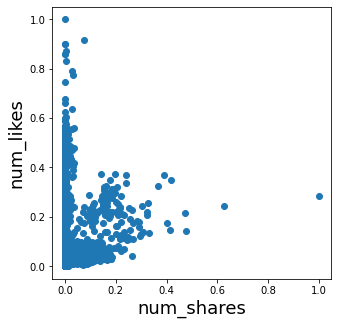

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df2['num_shares'], df2['num_likes'])
plt.xlabel('num_shares', fontsize=18)
plt.ylabel('num_likes', fontsize=18)

Defining colors and ploting centroids for all clusters

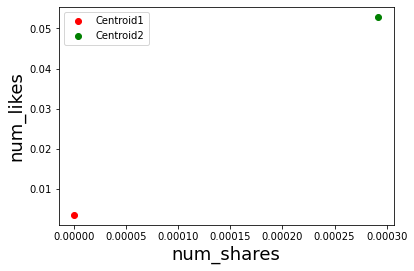

In [ ]:
colmap = {0: 'r', 1: 'g'}
labels=['Centroid1','Centroid2']
for i in range(k):
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i],label=labels[i])
plt.xlabel('num_shares', fontsize=18)
plt.ylabel('num_likes', fontsize=18)
plt.legend()
plt.show()

Showing complete graph

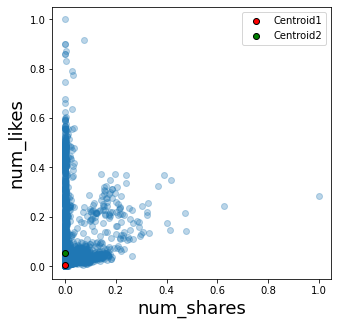

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df2['num_shares'], df2['num_likes'],alpha = 0.3)
colmap = {0: 'r', 1: 'g'}
col = [0,1]
labels=['Centroid1','Centroid2']
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], c=colmap[i], edgecolor='k',label=labels[i])
plt.xlabel('num_shares', fontsize=18)
plt.ylabel('num_likes', fontsize=18)
plt.legend()
plt.show()

Assignment datapoints to the cluster

In [ ]:
def assignment(df2, centroids):
    for i in range(2):
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df2['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df2['num_shares'] - centroids[i][0]) ** 2
                + (df2['num_likes'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df2['closest'] = df2.loc[:, centroid_distance_cols].idxmin(axis=1)
    df2['closest'] = df2['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df2['color'] = df2['closest'].map(lambda x: colmap[x])
    return df2

In [ ]:
df2 = assignment(df2, centroids)

In [ ]:
df2

,num_shares,num_likes,distance_from_0,distance_from_1,closest,color
0,0.076519,0.091720,1.166986e-01,0.085558,1,g
1,0.000000,0.031847,2.823779e-02,0.021021,1,g
2,0.016647,0.043312,4.305158e-02,0.018941,1,g
3,0.000000,0.023567,1.995754e-02,0.029301,0,r
4,0.000000,0.043312,3.970276e-02,0.009559,1,g
...,...,...,...,...,...,...
7045,0.000000,0.018896,1.528663e-02,0.033972,0,r
7046,0.000000,0.002972,6.369408e-04,0.049895,0,r
7047,0.000000,0.000212,3.397026e-03,0.052655,0,r
7048,0.006425,0.074098,7.078056e-02,0.022100,1,g


Visualisation of clusters with colors

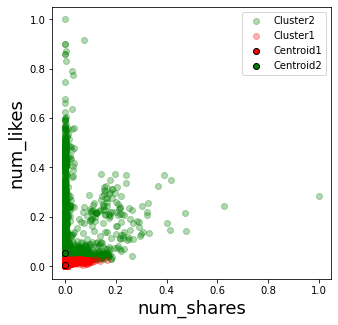

In [ ]:
fig = plt.figure(figsize=(5, 5))
colors = ['r',  'g'] 
label=['Cluster1','Cluster2']
labels=['Centroid1','Centroid2']
for c in df2['closest'].unique():
    d = df2[df2['closest'] == c]
    plt.scatter(d['num_shares'], d['num_likes'], color=colors[c],label=label[c],alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k',label=labels[i])
plt.xlabel('num_shares', fontsize=18)
plt.ylabel('num_likes', fontsize=18)
plt.legend()
plt.show()

Update Stage
Updating the centroids

In [ ]:
def update(k):
    for i in range(2):
        centroids[i][0] = np.mean(df2[df2['closest'] == i]['num_shares'])
        centroids[i][1] = np.mean(df2[df2['closest'] == i]['num_likes'])
    return k

In [ ]:
centroids = update(centroids)
centroids

{0: [0.003908274758501499, 0.008216114471266136],
 1: [0.027861511855691128, 0.12348084072724577]}

Visualising the graph with updated centroids

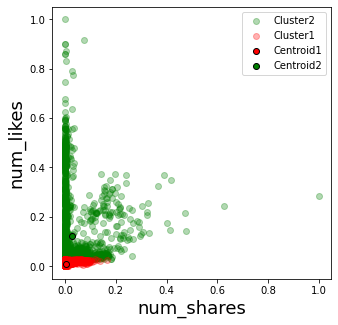

In [ ]:
fig = plt.figure(figsize=(5, 5))
colors = ['r',  'g'] 
label=['Cluster1','Cluster2']
labels=['Centroid1','Centroid2']
for c in df2['closest'].unique():
    d = df2[df2['closest'] == c]
    plt.scatter(d['num_shares'], d['num_likes'], color=colors[c],label=label[c],alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k',label=labels[i])
plt.xlabel('num_shares', fontsize=18)
plt.ylabel('num_likes', fontsize=18)
plt.legend()
plt.show()

Repeat assignment stage to to ressign the points with clusters

In [ ]:
df2 = assignment(df2, centroids)

Visualising the updated graph

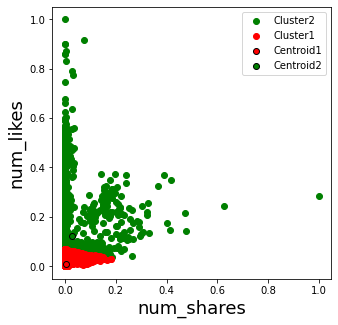

In [ ]:
fig = plt.figure(figsize=(5, 5))
colors = ['r',  'g'] 
label=['Cluster1','Cluster2']
labels=['Centroid1','Centroid2']
for c in df2['closest'].unique():
    d = df2[df2['closest'] == c]
    plt.scatter(d['num_shares'], d['num_likes'], color=colors[c],label=label[c])
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k',label=labels[i])
plt.xlabel('num_shares', fontsize=18)
plt.ylabel('num_likes', fontsize=18)
plt.legend()
plt.show()

Continuing until all assigned clusters don't change any more

In [ ]:
while True:
    closest_centroids = df2['closest'].copy(deep=True)
    centroids = update(centroids)
    df2 = assignment(df2, centroids)
    if closest_centroids.equals(df2['closest']):
        break

Final Result :

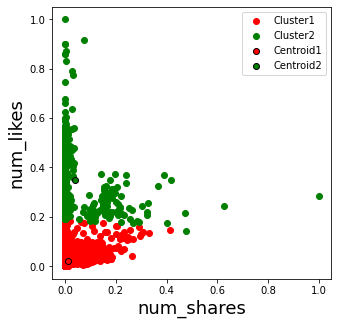

In [ ]:
fig = plt.figure(figsize=(5, 5))
colors = ['r',  'g'] 
label=['Cluster1','Cluster2']
labels=['Centroid1','Centroid2']
for c in df2['closest'].unique():
    d = df2[df2['closest'] == c]
    plt.scatter(d['num_shares'], d['num_likes'], color=colors[c],label=label[c])
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k',label=labels[i])
plt.xlabel('num_shares', fontsize=18)
plt.ylabel('num_likes', fontsize=18)
plt.legend()
plt.show()

In [ ]:
df2

,num_shares,num_likes,distance_from_0,distance_from_1,closest,color
0,0.076519,0.091720,0.096013,0.260086,0,r
1,0.000000,0.031847,0.013060,0.319998,0,r
2,0.016647,0.043312,0.021588,0.306893,0,r
3,0.000000,0.023567,0.009561,0.328214,0,r
4,0.000000,0.043312,0.022507,0.308628,0,r
...,...,...,...,...,...,...
7045,0.000000,0.018896,0.010357,0.332850,0,r
7046,0.000000,0.002972,0.022118,0.348661,0,r
7047,0.000000,0.000212,0.024637,0.351402,0,r
7048,0.006425,0.074098,0.051265,0.277276,0,r


In [ ]:
dfcopy=pd.read_csv(r"C:\Users\hp 2018\Downloads\Live_20210128.csv")

In [ ]:
dfcopy

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
df2['status_type']=X2['status_type']

In [ ]:
df2['status']=dfcopy['status_type']

In [ ]:
df2

,num_shares,num_likes,distance_from_0,distance_from_1,closest,color,status,status_type
0,0.076519,0.091720,0.096013,0.260086,0,r,video,3
1,0.000000,0.031847,0.013060,0.319998,0,r,photo,1
2,0.016647,0.043312,0.021588,0.306893,0,r,video,3
3,0.000000,0.023567,0.009561,0.328214,0,r,photo,1
4,0.000000,0.043312,0.022507,0.308628,0,r,photo,1
...,...,...,...,...,...,...,...,...
7045,0.000000,0.018896,0.010357,0.332850,0,r,photo,1
7046,0.000000,0.002972,0.022118,0.348661,0,r,photo,1
7047,0.000000,0.000212,0.024637,0.351402,0,r,photo,1
7048,0.006425,0.074098,0.051265,0.277276,0,r,photo,1


In [ ]:
df3=df2.loc[df2['closest']==0]

In [ ]:
df3
    

,num_shares,num_likes,distance_from_0,distance_from_1,closest,color,status,status_type
0,0.076519,0.091720,0.096013,0.260086,0,r,video,3
1,0.000000,0.031847,0.013060,0.319998,0,r,photo,1
2,0.016647,0.043312,0.021588,0.306893,0,r,video,3
3,0.000000,0.023567,0.009561,0.328214,0,r,photo,1
4,0.000000,0.043312,0.022507,0.308628,0,r,photo,1
...,...,...,...,...,...,...,...,...
7045,0.000000,0.018896,0.010357,0.332850,0,r,photo,1
7046,0.000000,0.002972,0.022118,0.348661,0,r,photo,1
7047,0.000000,0.000212,0.024637,0.351402,0,r,photo,1
7048,0.006425,0.074098,0.051265,0.277276,0,r,photo,1


In [ ]:
df3.to_csv('C:/Users/hp 2018/Downloads/Facebook Clusters 0.csv')


In [ ]:
df4=df2.loc[df2['closest']==1]

In [ ]:
df4

,num_shares,num_likes,distance_from_0,distance_from_1,closest,color,status,status_type
99,0.219918,0.283015,0.334521,0.191362,1,g,video,3
112,0.000292,0.207856,0.185159,0.147006,1,g,photo,1
166,0.075058,0.916136,0.895608,0.567910,1,g,photo,1
343,0.020152,0.240127,0.217459,0.111019,1,g,video,3
355,0.000292,0.246497,0.223761,0.110335,1,g,photo,1
...,...,...,...,...,...,...,...,...
6271,0.012266,0.204246,0.181339,0.147742,1,g,photo,1
6272,0.002921,0.407006,0.384136,0.068820,1,g,photo,1
6296,0.108645,0.248620,0.246493,0.121619,1,g,video,3
6297,0.000292,0.260085,0.237338,0.097801,1,g,video,3


In [ ]:
df4.to_csv('C:/Users/hp 2018/Downloads/Facebook Clusters 1.csv')

In [ ]:
df5=pd.read_csv(r"C:/Users/hp 2018/Downloads/Facebook Clusters 0.csv")

In [ ]:
df6=pd.read_csv(r"C:/Users/hp 2018/Downloads/Facebook Clusters 1.csv")

Text(0, 0.5, 'num_likes')

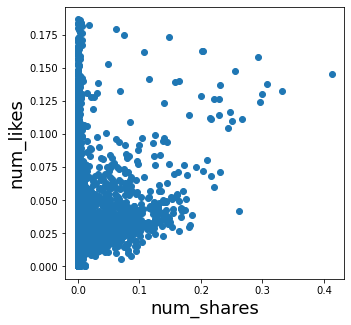

In [ ]:
#graph for cluster 1
fig = plt.figure(figsize=(5, 5))
plt.scatter(df5['num_shares'], df5['num_likes'])
plt.xlabel('num_shares', fontsize=18)
plt.ylabel('num_likes', fontsize=18)

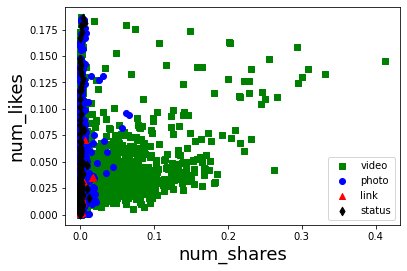

In [ ]:
colors = ['r', 'b', 'k', 'g'] 
markers = ['^', 'o', 'd', 's']
labels=['link','photo','status','video']
for c in df5['status_type'].unique():
  d = df5[df5['status_type'] == c]
  plt.scatter(d['num_shares'], d['num_likes'], marker=markers[c], color=colors[c],label=labels[c])
plt.xlabel('num_shares', fontsize=18)
plt.ylabel('num_likes', fontsize=18)
plt.legend()

<AxesSubplot:xlabel='status'>

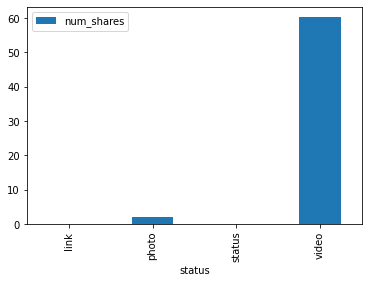

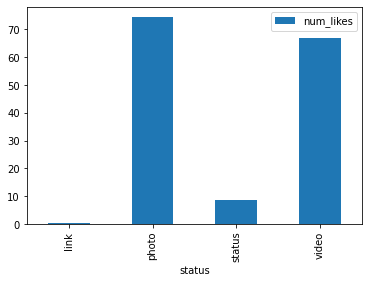

In [ ]:
#barchart for cluster 1
df5.groupby('status').sum().plot(kind='bar', y='num_shares')
df5.groupby('status').sum().plot(kind='bar', y='num_likes')


Text(0, 0.5, 'num_likes')

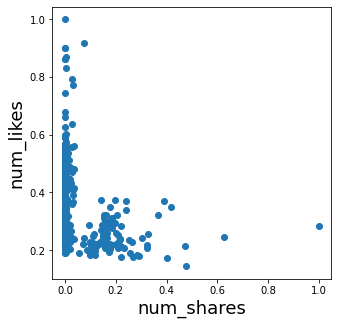

In [ ]:
#graph for cluster 2
fig = plt.figure(figsize=(5, 5))
plt.scatter(df6['num_shares'], df6['num_likes'])
plt.xlabel('num_shares', fontsize=18)
plt.ylabel('num_likes', fontsize=18)

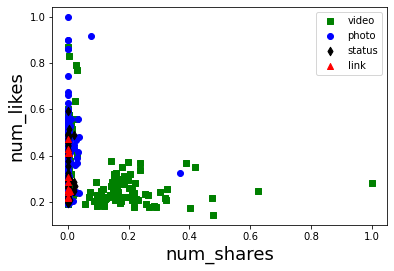

In [ ]:
colors = ['r', 'b', 'k', 'g'] 
markers = ['^', 'o', 'd', 's']
labels=['link','photo','status','video']
for c in df6['status_type'].unique():
  d = df6[df6['status_type'] == c]
  plt.scatter(d['num_shares'], d['num_likes'], marker=markers[c], color=colors[c],label=labels[c])
plt.xlabel('num_shares', fontsize=18)
plt.ylabel('num_likes', fontsize=18)
plt.legend()

<AxesSubplot:xlabel='status'>

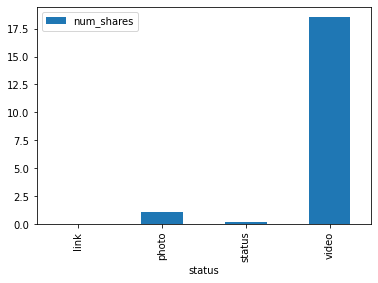

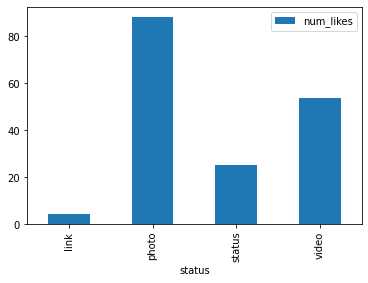

In [ ]:
#barchart for cluster 2
df6.groupby('status').sum().plot(kind='bar', y='num_shares')
df6.groupby('status').sum().plot(kind='bar', y='num_likes')
